# Construindo um Modelo de Evasão de Funcionários: Um Estudo de Caso em Análise de Recursos Humanos

## Definição do problema.

### Visão Geral do Projeto
A rotatividade de funcionários (também conhecida como "evasão de funcionários") é um problema caro para as empresas. O verdadeiro custo de substituir um funcionário pode ser bastante alto. Um estudo do Center for American Progress descobriu que as empresas geralmente gastam cerca de um quinto do salário de um funcionário para substituí-lo, e o custo pode aumentar significativamente se for necessário substituir executivos ou funcionários mais bem pagos.

Em outras palavras, o custo de substituir funcionários para a maioria dos empregadores permanece significativo. Isso se deve ao tempo gasto para entrevistar e encontrar um substituto, bônus de contratação e a perda de produtividade por vários meses enquanto o novo funcionário se acostuma ao novo papel.

### Declaração do Problema

Compreender por que e quando os funcionários têm mais probabilidade de sair pode levar a ações para melhorar a retenção de funcionários, bem como possivelmente planejar novas contratações com antecedência. Utilizarei uma abordagem sistemática passo a passo usando um método que pode ser usado para uma variedade de problemas de ML. Este projeto se enquadra no que é comumente conhecido como "Análise de RH" ou "Análise de Pessoas".

Neste estudo, tentaremos resolver a seguinte declaração de problema:

 * Qual é a probabilidade de um funcionário ativo deixar a empresa?
 * Quais são os principais indicadores de que um funcionário está deixando a empresa?
 * Quais políticas ou estratégias podem ser adotadas com base nos resultados para melhorar a retenção de funcionários? **

Dado que temos dados sobre ex-funcionários, este é um problema de classificação supervisionada padrão onde o rótulo é uma variável binária, 0 (funcionário ativo), 1 (ex-funcionário). Neste estudo, nossa variável alvo Y é a probabilidade de um funcionário deixar a empresa.

### Análise do Dataset

Neste estudo de caso, um conjunto de dados de RH foi obtido do [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset), que contém dados de funcionários de 1.470 funcionários com diversas informações sobre os funcionários.

Usarei esse conjunto de dados para prever quando os funcionários vão pedir demissão, entendendo os principais fatores da rotatividade de funcionários.



## Importando as bibliotecas necessarias para nosso projeto.

In [1]:
# importando bibliotecas diversas
import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse
import warnings
warnings.filterwarnings('ignore')

# Importando bibliotecas para manipulação e análise de dados
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

# Importando bibliotecas para visualizações de dados
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None

# Standard plotly imports
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

# sklearn modules para pré-processamento
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Bibliotecas para modelagem de dados
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# sklearn Model auxiliar
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# módulos sklearn para métricas de desempenho
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

### Importando os dados.


 *  Vamos importar o conjunto de dados e fazer uma cópia do arquivo fonte para esta análise. O conjunto de dados contém 1.470 linhas e 35 colunas.

In [2]:
df = pd.read_excel('/content/WA_Fn-UseC_-HR-Employee-Attrition.xlsx')
print("Formato do Dataset é: {}".format(df.shape))

Formato do Dataset é: (1470, 35)


In [3]:
df_copia = df.copy()

## Descrição de dados e visualizações exploratórias

Nesta seção, forneceremos visualizações de dados que resumem ou extraem características relevantes dos atributos em nosso conjunto de dados. Vamos analisar cada coluna em detalhes, obter uma melhor compreensão do conjunto de dados e agrupá-los quando apropriado.

### Visão geral

In [4]:
df_copia.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df_copia.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2



O conjunto de dados contém várias colunas numéricas e categóricas que fornecem diversas informações sobre detalhes pessoais e profissionais do funcionário.

In [6]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Os dados fornecidos não apresentam valores Nulos. Em Análise de Recursos Humanos, é improvável que os dados de funcionários tenham uma alta proporção de valores faltantes, já que os departamentos de RH geralmente possuem todos os dados pessoais e de emprego em arquivo. No entanto, o tipo de documentação em que os dados são armazenados (por exemplo, se são em papel, planilhas Excel, bancos de dados etc.) tem um impacto enorme na precisão e facilidade de acesso aos dados de RH.

### Visão geral das variaveis numéricas

In [7]:
df_copia.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


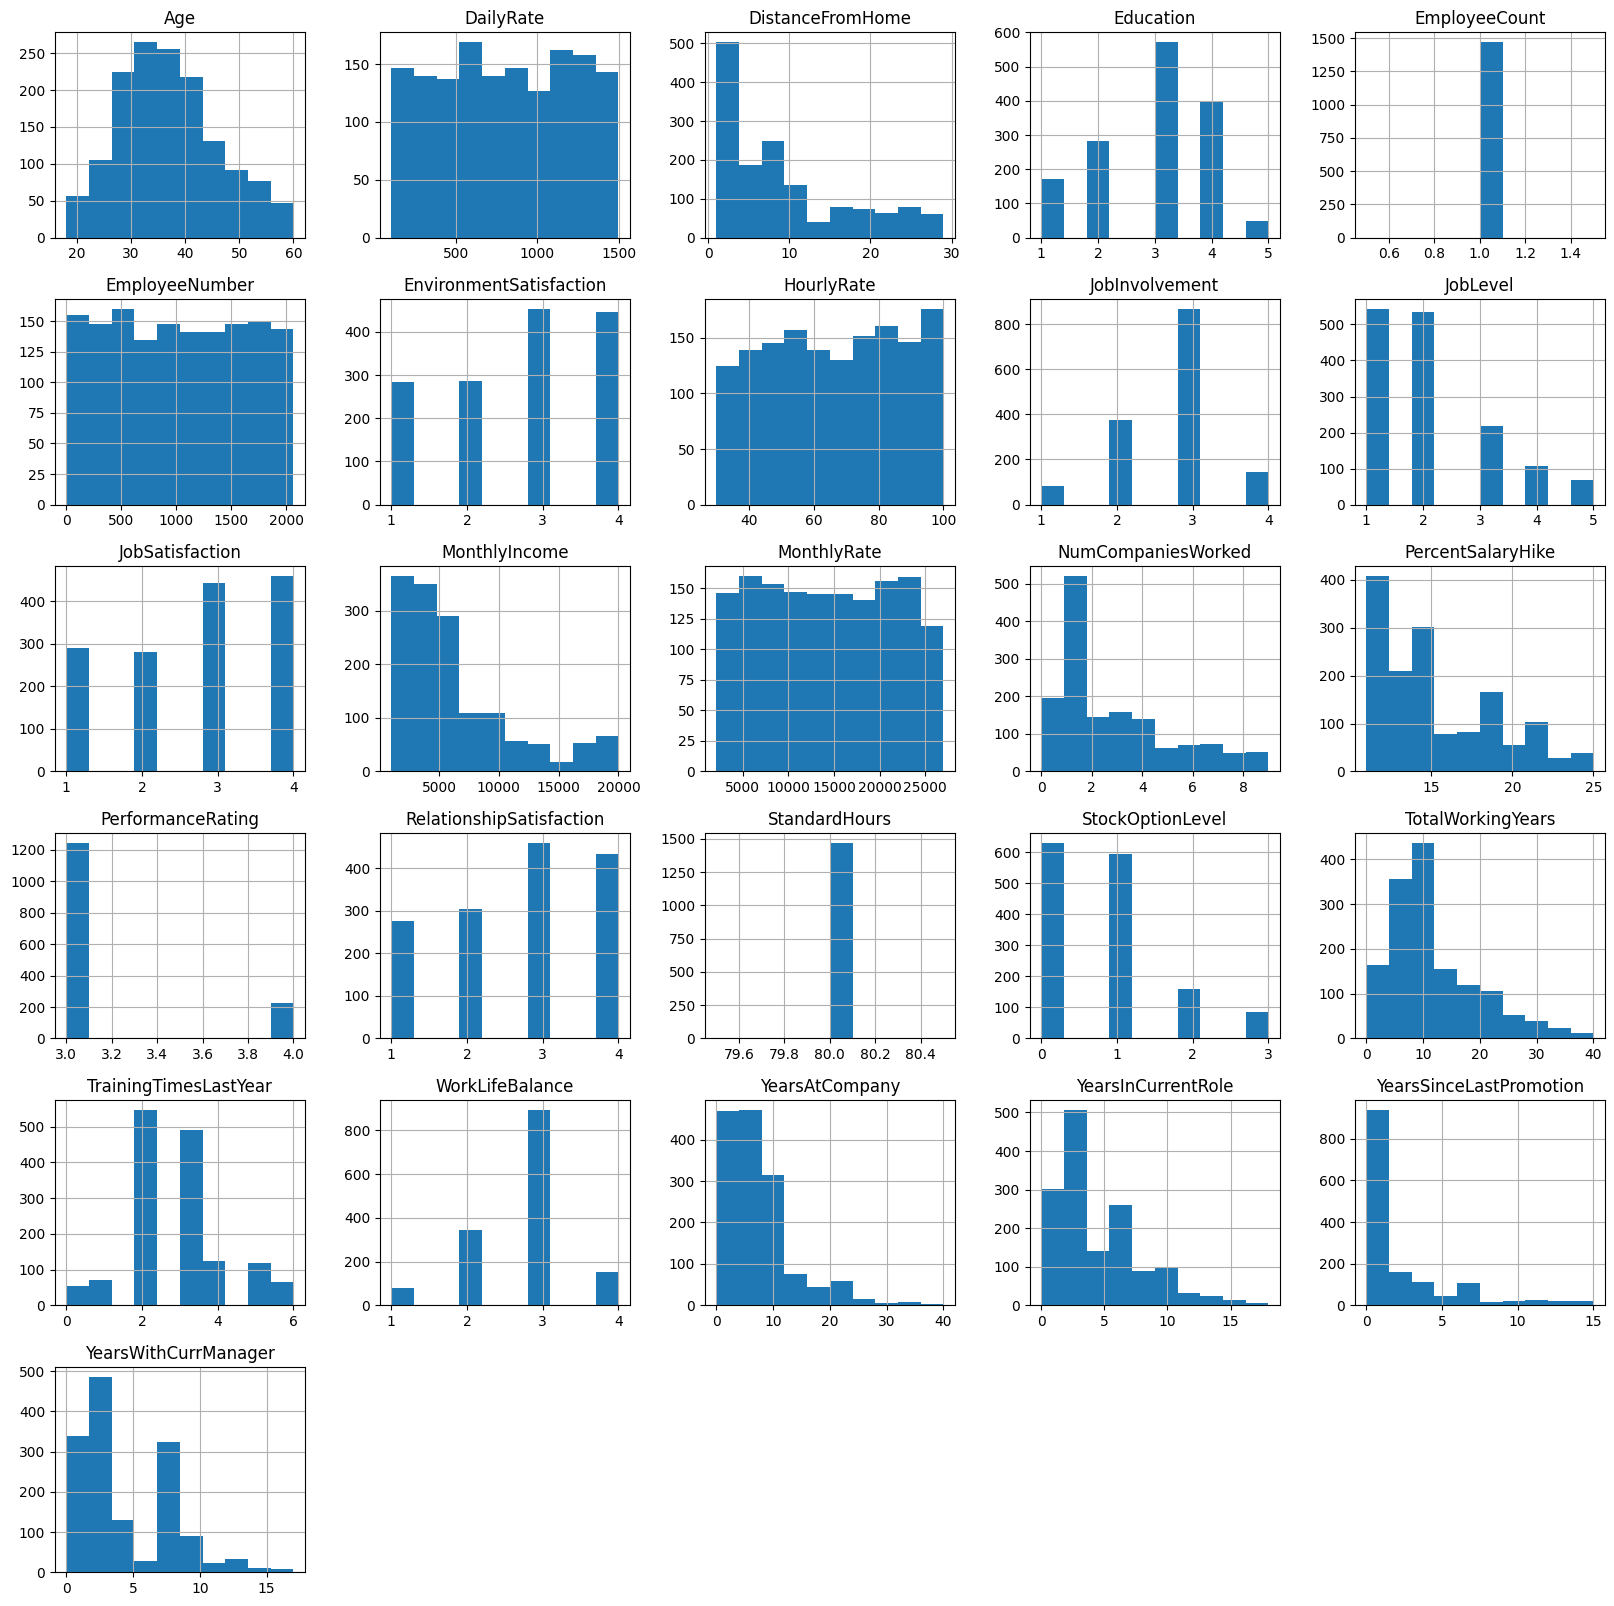

In [8]:
df_copia.hist(figsize=(20,20))
plt.show()

Algumas observações podem ser feitas com base nas informações e histogramas para os atributos numéricos:

 * Muitos histogramas são pesados na cauda; de fato, várias distribuições são assimétricas à direita (por exemplo, RendaMensal, DistanciaDoTrabalho, AnosNaEmpresa). Pode ser necessário aplicar métodos de transformação de dados para aproximar uma distribuição normal antes de ajustar um modelo aos dados.

 * A distribuição de idade é uma distribuição normal ligeiramente assimétrica à direita, com a maior parte do pessoal entre 25 e 45 anos.

 * NumeroDeFuncionarios e HorasPadrao são valores constantes para todos os funcionários. Provavelmente são atributos redundantes.

 * NumeroDoFuncionario provavelmente é um identificador único para os funcionários, dada a distribuição quase uniforme do atributo.

## Distribuição de atributos por atributo-alvo

### Idade

 * As distribuições de idade para funcionários ativos e ex-funcionários diferem em apenas um ano.
 * A idade média dos ex-funcionários é de 33,6 anos, enquanto a idade média dos funcionários atuais é de 37,6 anos.

In [9]:
(mu, sigma) = norm.fit(df_copia.loc[df_copia['Attrition'] == 'Yes', 'Age'])
print(
    'Ex funcionarios: media de idade = {:.1f} anos, e desvio padrão = {:.1f}'.format(mu, sigma))
(mu, sigma) = norm.fit(df_copia.loc[df_copia['Attrition'] == 'No', 'Age'])
print('Funcionarios: media de idade = {:.1f} anos, e desvio padrão = {:.1f}'.format(
    mu, sigma))

Ex funcionarios: media de idade = 33.6 anos, e desvio padrão = 9.7
Funcionarios: media de idade = 37.6 anos, e desvio padrão = 8.9


Vamos criar um gráfico de densidade de kernel (KDE) colorido pelo valor do atributo-alvo. Uma estimativa de densidade de kernel (KDE) é uma maneira não paramétrica de estimar a função de densidade de probabilidade de uma variável aleatória.

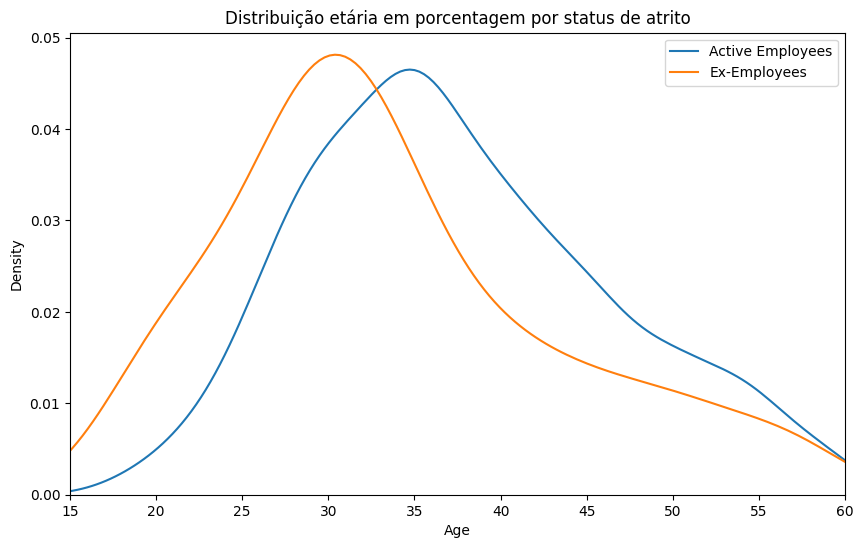

In [10]:
x1 = df_copia.loc[df_copia['Attrition'] == 'No', 'Age']
x2 = df_copia.loc[df_copia['Attrition'] == 'Yes', 'Age']

fig, ax = plt.subplots(figsize=(10, 6))

sns.kdeplot(x1, label='Active Employees', ax=ax)
sns.kdeplot(x2, label='Ex-Employees', ax=ax)

ax.set_title('Distribuição etária em porcentagem por status de atrito')
ax.set_xlim([15, 60])
ax.set_xticks(range(15, 61, 5))
ax.legend()

plt.show()

### Educação

O conjunto de dados apresenta várias áreas de formação, a saber: Recursos Humanos, Ciências da Vida, Marketing, Médico, Graduação Técnica e uma categoria miscênea Outros. Aqui, ploto a porcentagem normalizada de desligamentos para cada área de formação.

In [11]:
df_copia['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

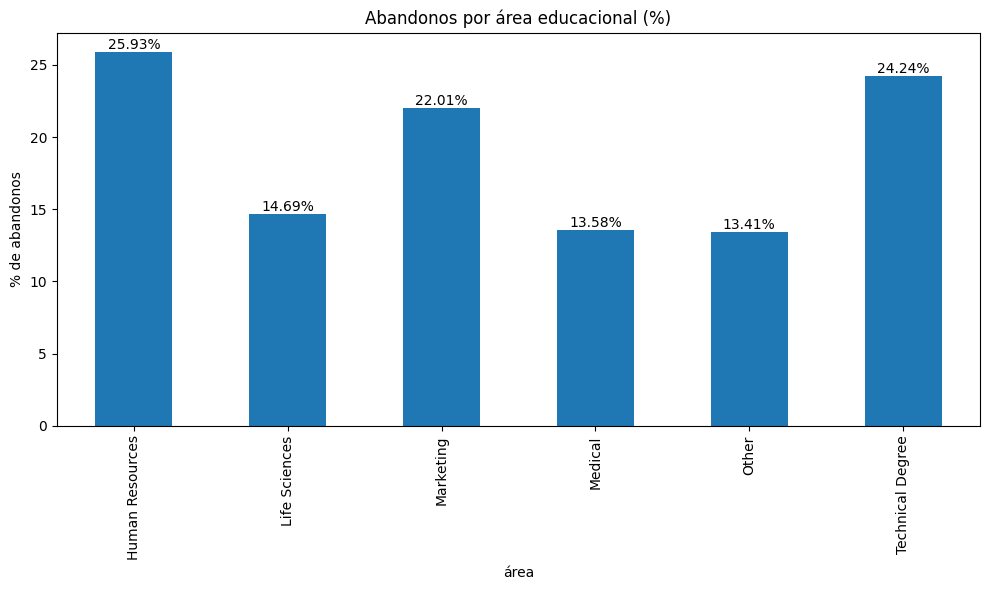

In [12]:
df_EducationField = pd.DataFrame(columns=["Field", "% of Leavers"])
i = 0
for field in list(df_copia['EducationField'].unique()):
    ratio = df_copia[(df_copia['EducationField'] == field) & (df_copia['Attrition'] == "Yes")].shape[0] / df_copia[df_copia['EducationField'] == field].shape[0]
    df_EducationField.loc[i] = (field, ratio * 100)
    i += 1

df_EF = df_EducationField.groupby(by="Field").sum()

fig, ax = plt.subplots(figsize=(10, 6))
df_EF.plot(kind='bar', legend=False, ax=ax)
ax.set_title('Abandonos por área educacional (%)')
ax.set_xlabel('área')
ax.set_ylabel('% de abandonos')

for index, value in enumerate(df_EF["% of Leavers"]):
    ax.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Genero

A distribuição de gênero mostra que o conjunto de dados apresenta uma proporção relativa mais alta de ex-funcionários homens do que ex-funcionárias mulheres, com uma distribuição de gênero normalizada de ex-funcionários no conjunto de dados de 17,0% para homens e 14,8% para mulheres.

In [13]:
df_copia['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [14]:
print("Distribuição normalizada por gênero de ex-funcionários no conjunto de dados: Masculino = {:.1f}%; Feminino {:.1f}%.".format((df_copia[(df_copia['Attrition'] == 'Yes') & (
    df_copia['Gender'] == 'Male')].shape[0] / df_copia[df_copia['Gender'] == 'Male'].shape[0])*100, (df_copia[(df_copia['Attrition'] == 'Yes') & (df_copia['Gender'] == 'Female')].shape[0] / df_copia[df_copia['Gender'] == 'Female'].shape[0])*100))

Distribuição normalizada por gênero de ex-funcionários no conjunto de dados: Masculino = 17.0%; Feminino 14.8%.


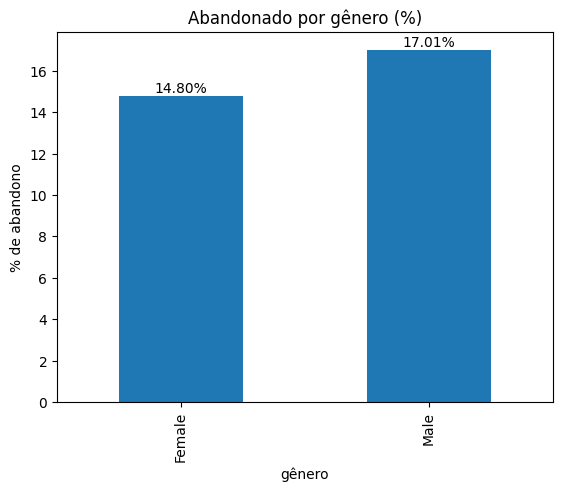

In [15]:
df_Gender = pd.DataFrame(columns=["Gender", "% of Leavers"])
i = 0
for field in list(df_copia['Gender'].unique()):
    ratio = df_copia[(df_copia['Gender'] == field) & (df_copia['Attrition'] == "Yes")].shape[0] / df_copia[df_copia['Gender'] == field].shape[0]
    df_Gender.loc[i] = (field, ratio * 100)
    i += 1

df_G = df_Gender.groupby(by="Gender").sum()

df_G.plot(kind='bar', legend=False)
plt.title('Abandonado por gênero (%)')
plt.xlabel('gênero')
plt.ylabel('% de abandono')

for index, value in enumerate(df_G["% of Leavers"]):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

### Estado Civil

O conjunto de dados apresenta três estados civis: Casado (673 funcionários), Solteiro (470 funcionários) e Divorciado (327 funcionários). Os funcionários solteiros apresentam a maior proporção de desligamentos, com 25%.

In [16]:
df_copia['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

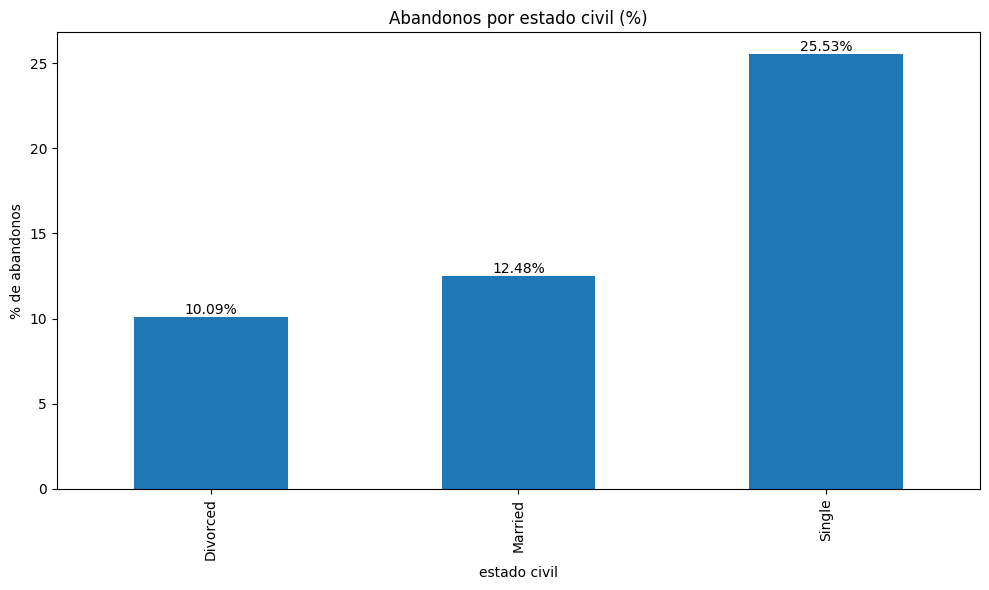

In [17]:
df_Marital = pd.DataFrame(columns=["Marital Status", "% of Leavers"])
i = 0
for field in list(df_copia['MaritalStatus'].unique()):
    ratio = df_copia[(df_copia['MaritalStatus'] == field) & (df_copia['Attrition'] == "Yes")].shape[0] / df_copia[df_copia['MaritalStatus'] == field].shape[0]
    df_Marital.loc[i] = (field, ratio * 100)
    i += 1

df_MF = df_Marital.groupby(by="Marital Status").sum()

fig, ax = plt.subplots(figsize=(10, 6))
df_MF.plot(kind='bar', legend=False, ax=ax)
ax.set_title('Abandonos por estado civil (%)')
ax.set_xlabel('estado civil')
ax.set_ylabel('% de abandonos')

for index, value in enumerate(df_MF["% of Leavers"]):
    ax.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Distancia de casa

A distância de casa até o trabalho para os funcionários varia de 1 a 29 milhas. Não há uma correlação forte discernível entre a Distância de Casa e o Status de Desligamento, conforme o gráfico de densidade de kernel abaixo.

In [18]:
print("A distância de casa para os funcionários chegarem ao trabalho é de {} a {} milhas.".format(df_copia['DistanceFromHome'].min(),
                                                                                       df_copia['DistanceFromHome'].max()))

A distância de casa para os funcionários chegarem ao trabalho é de 1 a 29 milhas.


In [19]:
print('Distância média de casa para funcionários atualmente ativos: {:.2f} milhas e ex-funcionários: {:.2f} milhas'.format(
    df_copia[df_copia['Attrition'] == 'No']['DistanceFromHome'].mean(), df_copia[df_copia['Attrition'] == 'Yes']['DistanceFromHome'].mean()))

Distância média de casa para funcionários atualmente ativos: 8.92 milhas e ex-funcionários: 10.63 milhas


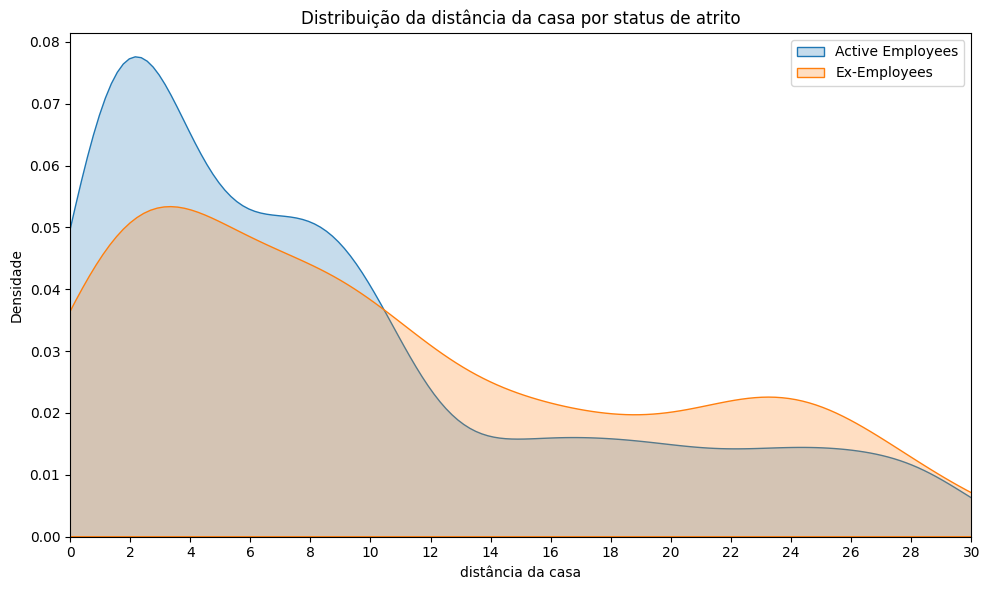

In [20]:
x1 = df_copia.loc[df_copia['Attrition'] == 'No', 'DistanceFromHome']
x2 = df_copia.loc[df_copia['Attrition'] == 'Yes', 'DistanceFromHome']

hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']

fig, ax = plt.subplots(figsize=(10, 6))

for data, label in zip(hist_data, group_labels):
    sns.kdeplot(data, ax=ax, label=label, fill=True)

ax.set_title('Distribuição da distância da casa por status de atrito')
ax.set_xlabel('distância da casa')
ax.set_ylabel('Densidade')
ax.set_xlim([0, 30])
ax.set_xticks(range(0, 31, 2))

ax.legend()

plt.tight_layout()
plt.show()

### Departamento

Os dados apresentam informações de funcionários de três departamentos: Pesquisa e Desenvolvimento, Vendas e Recursos Humanos.

In [21]:
df_copia['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

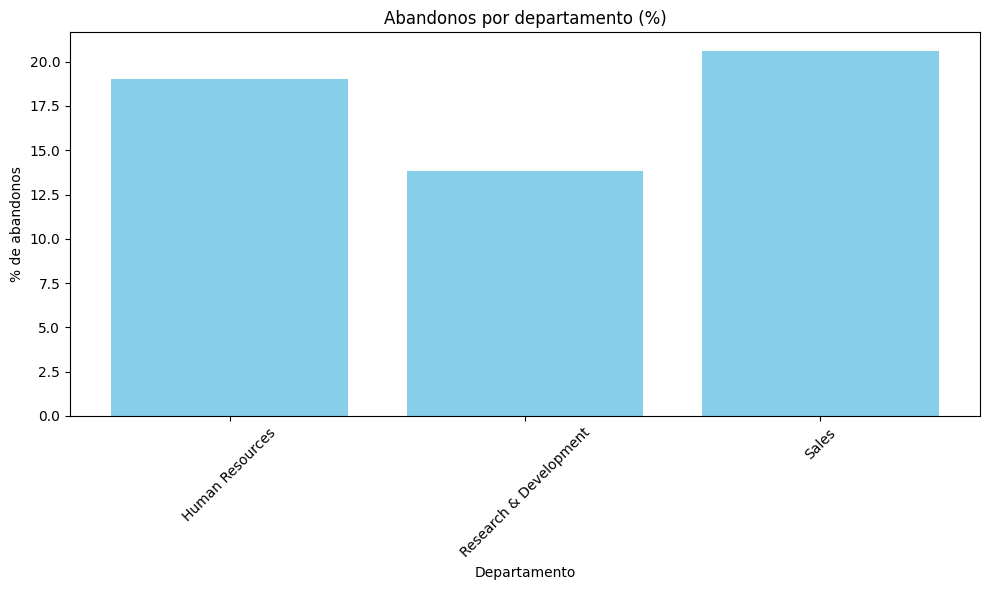

In [22]:
df_Department = pd.DataFrame(columns=["Department", "% of Leavers"])
i = 0
for field in list(df_copia['Department'].unique()):
    ratio = df_copia[(df_copia['Department'] == field) & (df_copia['Attrition'] == "Yes")].shape[0] / df_copia[df_copia['Department'] == field].shape[0]
    df_Department.loc[i] = (field, ratio * 100)
    i += 1

df_DF = df_Department.groupby(by="Department").sum()

plt.figure(figsize=(10, 6))
plt.bar(df_DF.index, df_DF["% of Leavers"], color='skyblue')

plt.title('Abandonos por departamento (%)')
plt.xlabel('Departamento')
plt.ylabel('% de abandonos')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Função e condições de trabalho

Um olhar preliminar na relação entre a frequência de Viagens a Negócios e o Status de Desligamento mostra que há uma maior proporção normalizada de Desligamentos para funcionários que viajam "frequentemente". As métricas de viagem associadas ao status de Viagem a Negócios não foram divulgadas (ou seja, quantas horas de viagem são consideradas "frequentes").

In [23]:
df_copia['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

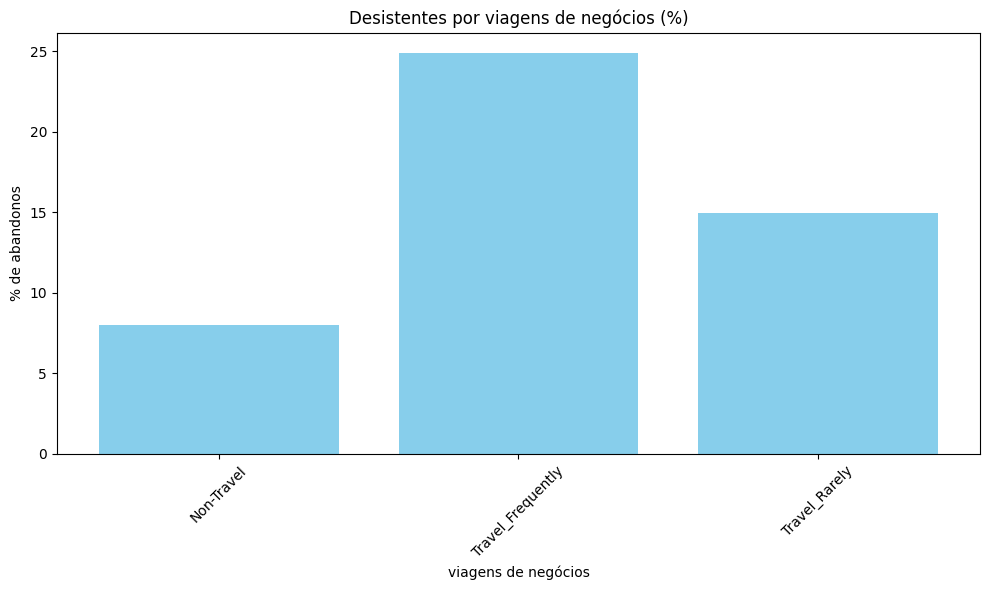

In [24]:
df_BusinessTravel = pd.DataFrame(columns=["Business Travel", "% of Leavers"])
i = 0
for field in list(df_copia['BusinessTravel'].unique()):
    ratio = df_copia[(df_copia['BusinessTravel'] == field) & (df_copia['Attrition'] == "Yes")].shape[0] / df_copia[df_copia['BusinessTravel'] == field].shape[0]
    df_BusinessTravel.loc[i] = (field, ratio * 100)
    i += 1

df_BT = df_BusinessTravel.groupby(by="Business Travel").sum()

plt.figure(figsize=(10, 6))
plt.bar(df_BT.index, df_BT["% of Leavers"], color='skyblue')

plt.title('Desistentes por viagens de negócios (%)')
plt.xlabel('viagens de negócios')
plt.ylabel('% de abandonos')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Vários cargos são listados no conjunto de dados: Sales Executive, Research Scientist, Laboratory Technician, Manufacturing Director, Healthcare Representative, Manager, Sales Representative, Research Director, Human Resources.

In [25]:
df_copia['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

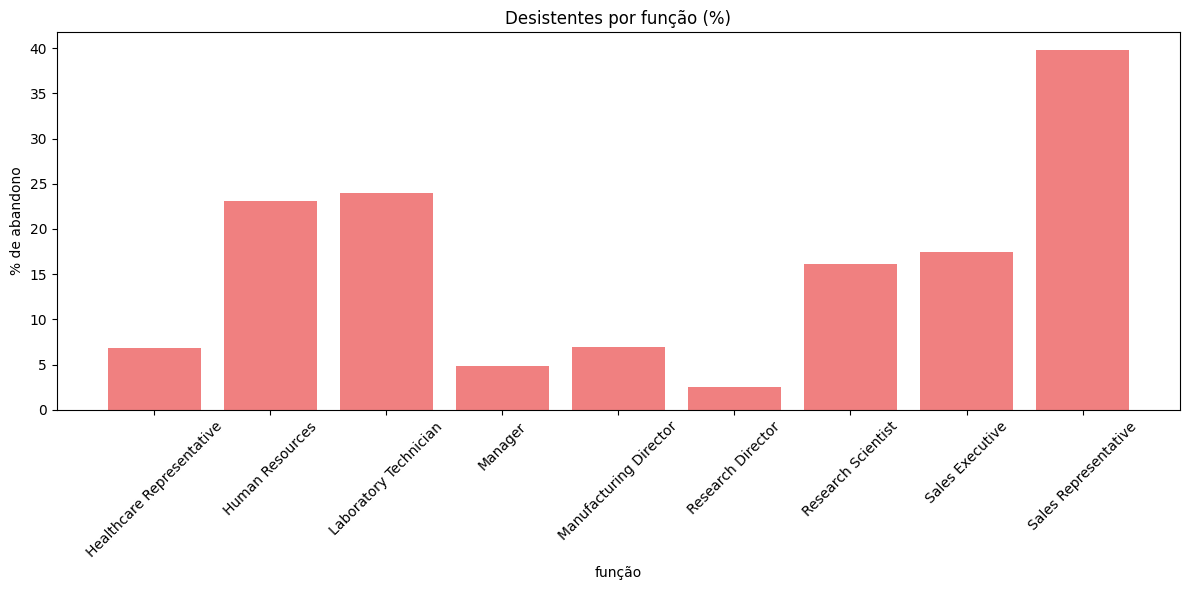

In [26]:
df_JobRole = pd.DataFrame(columns=["Job Role", "% of Leavers"])
i = 0
for field in list(df_copia['JobRole'].unique()):
    ratio = df_copia[(df_copia['JobRole'] == field) & (df_copia['Attrition'] == "Yes")].shape[0] / df_copia[df_copia['JobRole'] == field].shape[0]
    df_JobRole.loc[i] = (field, ratio * 100)
    i += 1

df_JR = df_JobRole.groupby(by="Job Role").sum()

plt.figure(figsize=(12, 6))
plt.bar(df_JR.index, df_JR["% of Leavers"], color='lightcoral')

plt.title('Desistentes por função (%)')
plt.xlabel('função')
plt.ylabel('% de abandono')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Os funcionários têm um nível atribuído dentro da organização que varia de 1 (funcionários) a 5 (gerente/diretor). Funcionários com um Nível de Cargo atribuído de "1" apresentam a maior proporção normalizada de Desistentes.

In [27]:
df_copia['JobLevel'].value_counts()

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

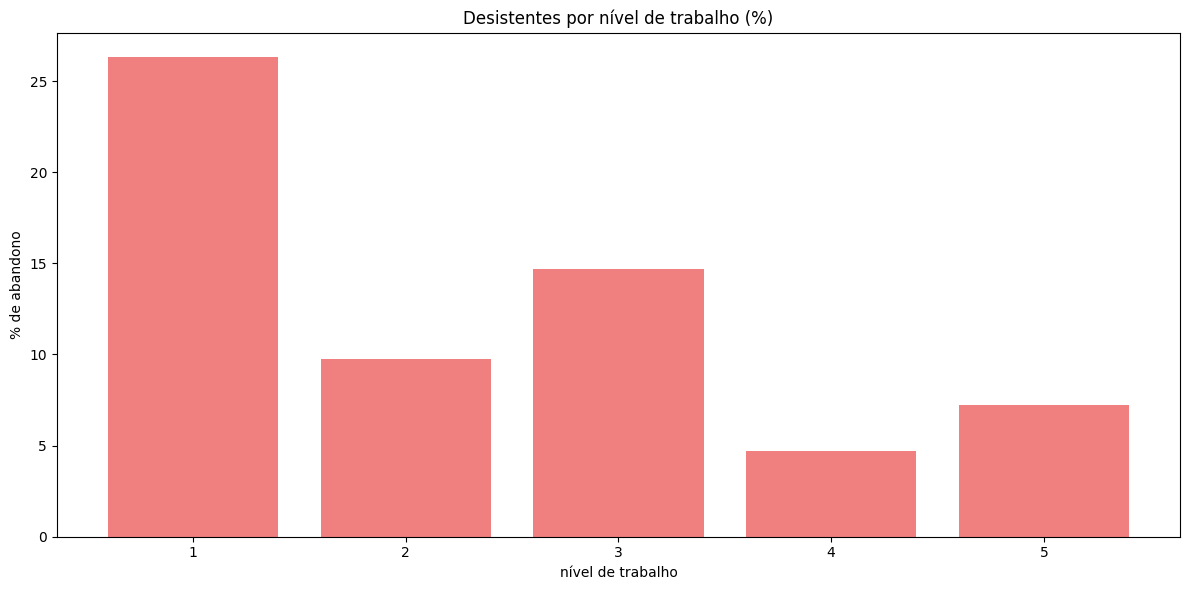

In [28]:
df_JobLevel = pd.DataFrame(columns=["Job Level", "% of Leavers"])
i = 0
for field in list(df_copia['JobLevel'].unique()):
    ratio = df_copia[(df_copia['JobLevel'] == field) & (df_copia['Attrition'] == "Yes")].shape[0] / df_copia[df_copia['JobLevel'] == field].shape[0]
    df_JobLevel.loc[i] = (field, ratio * 100)
    i += 1

df_JL = df_JobLevel.groupby(by="Job Level").sum()

plt.figure(figsize=(12, 6))
plt.bar(df_JL.index, df_JL["% of Leavers"], color='lightcoral')

plt.title('Desistentes por nível de trabalho (%)')
plt.xlabel('nível de trabalho')
plt.ylabel('% de abandono')

plt.tight_layout()
plt.show()

Uma classificação está associada ao envolvimento do funcionário no trabalho: 1 'Baixo', 2 'Médio', 3 'Alto', 4 'Muito Alto'. O gráfico abaixo indica uma correlação negativa com o envolvimento do funcionário no trabalho e o Status de Desligamento. Em outras palavras, funcionários com maior envolvimento no trabalho têm menos probabilidade de sair.

In [29]:
df_copia['JobInvolvement'].value_counts()

JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

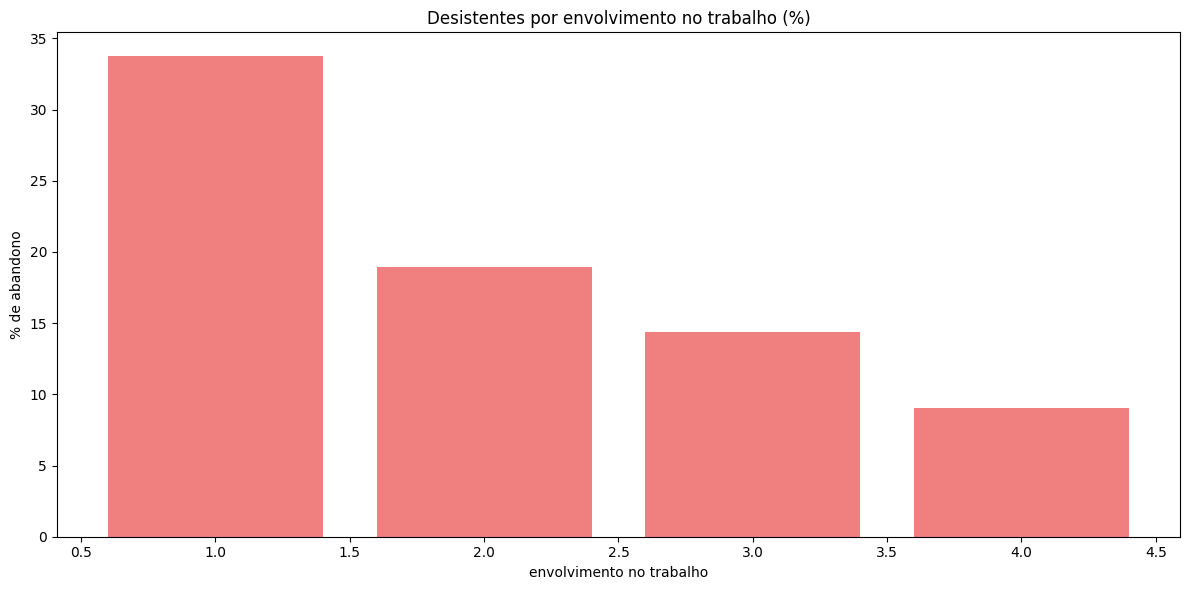

In [30]:
df_JobInvolvement = pd.DataFrame(columns=["Job Involvement", "% of Leavers"])
i = 0
for field in list(df_copia['JobInvolvement'].unique()):
    ratio = df_copia[(df_copia['JobInvolvement'] == field) & (df_copia['Attrition'] == "Yes")].shape[0] / df_copia[df_copia['JobInvolvement'] == field].shape[0]
    df_JobInvolvement.loc[i] = (field, ratio * 100)
    i += 1

df_JI = df_JobInvolvement.groupby(by="Job Involvement").sum()

plt.figure(figsize=(12, 6))
plt.bar(df_JI.index, df_JI["% of Leavers"], color='lightcoral')

plt.title('Desistentes por envolvimento no trabalho (%)')
plt.xlabel('envolvimento no trabalho')
plt.ylabel('% de abandono')

plt.tight_layout()
plt.show()

Os dados indicam que os colaboradores podem ter acesso a alguma Formação. Um recurso indica há quantos anos o funcionário participou desse treinamento.

In [31]:
print("O número de treinamentos no ano passado varia de {} a {} anos.".format(
    df_copia['TrainingTimesLastYear'].min(), df_copia['TrainingTimesLastYear'].max()))

O número de treinamentos no ano passado varia de 0 a 6 anos.


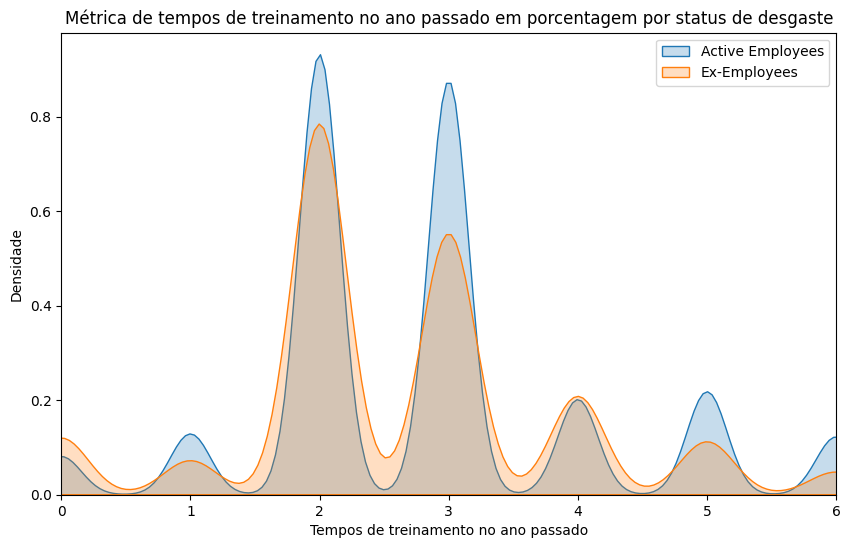

In [32]:
x1 = df_copia.loc[df_copia['Attrition'] == 'No', 'TrainingTimesLastYear']
x2 = df_copia.loc[df_copia['Attrition'] == 'Yes', 'TrainingTimesLastYear']

plt.figure(figsize=(10, 6))

sns.kdeplot(x1, label='Active Employees', fill=True, bw_adjust=0.5)
sns.kdeplot(x2, label='Ex-Employees', fill=True, bw_adjust=0.5)

plt.title('Métrica de tempos de treinamento no ano passado em porcentagem por status de desgaste')
plt.xlabel('Tempos de treinamento no ano passado')
plt.ylabel('Densidade')
plt.legend()

plt.xlim(0, 6)
plt.xticks(range(0, 7))

plt.show()

Há uma característica para o número de empresas em que o funcionário trabalhou. 0 provavelmente indica que, de acordo com os registros, o funcionário trabalhou apenas nesta empresa.

In [33]:
df_copia['NumCompaniesWorked'].value_counts()

NumCompaniesWorked
1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: count, dtype: int64

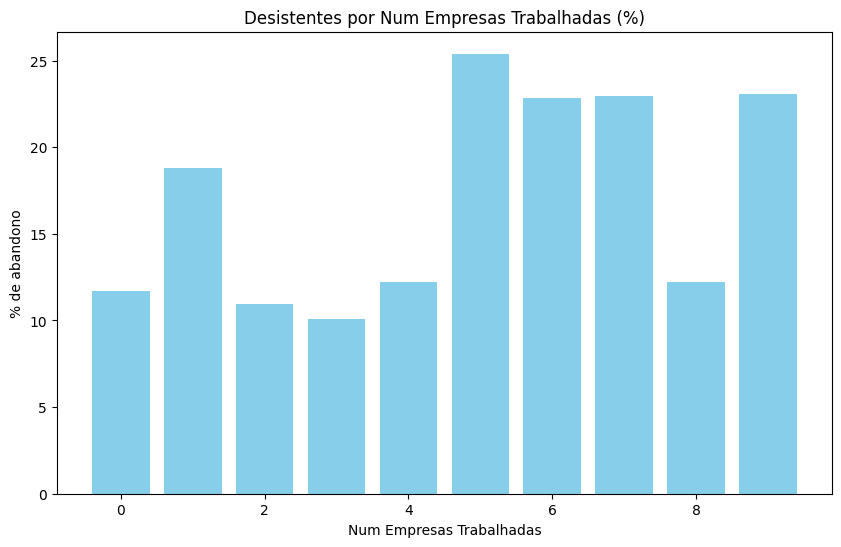

In [34]:
df_NumCompaniesWorked = pd.DataFrame(columns=["Num Companies Worked", "% of Leavers"])

i = 0
for field in list(df_copia['NumCompaniesWorked'].unique()):
    ratio = df_copia[(df_copia['NumCompaniesWorked'] == field) & (df_copia['Attrition'] == "Yes")].shape[0] / df_copia[df_copia['NumCompaniesWorked'] == field].shape[0]
    df_NumCompaniesWorked.loc[i] = (field, ratio * 100)
    i += 1

df_NC = df_NumCompaniesWorked.groupby(by="Num Companies Worked").sum()

plt.figure(figsize=(10, 6))
plt.bar(df_NC.index, df_NC['% of Leavers'], color='skyblue')

plt.title('Desistentes por Num Empresas Trabalhadas (%)')
plt.xlabel('Num Empresas Trabalhadas')
plt.ylabel('% de abandono')

plt.show()

### Anos na Empresa.



In [35]:
df_copia

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [36]:
print('Número médio de anos na empresa para funcionários atualmente ativos: {:.2f} milhas e ex-funcionários: {:.2f} anos'.format(
    df_copia[df_copia['Attrition'] == 'No']['YearsAtCompany'].mean(), df_copia[df_copia['Attrition'] == 'Yes']['YearsAtCompany'].mean()))

Número médio de anos na empresa para funcionários atualmente ativos: 7.37 milhas e ex-funcionários: 5.13 anos


In [37]:
print("Número de anos na empresa varia de {} a {} anos.".format(
    df_copia['YearsAtCompany'].min(), df_copia['YearsAtCompany'].max()))

Número de anos na empresa varia de 0 a 40 anos.


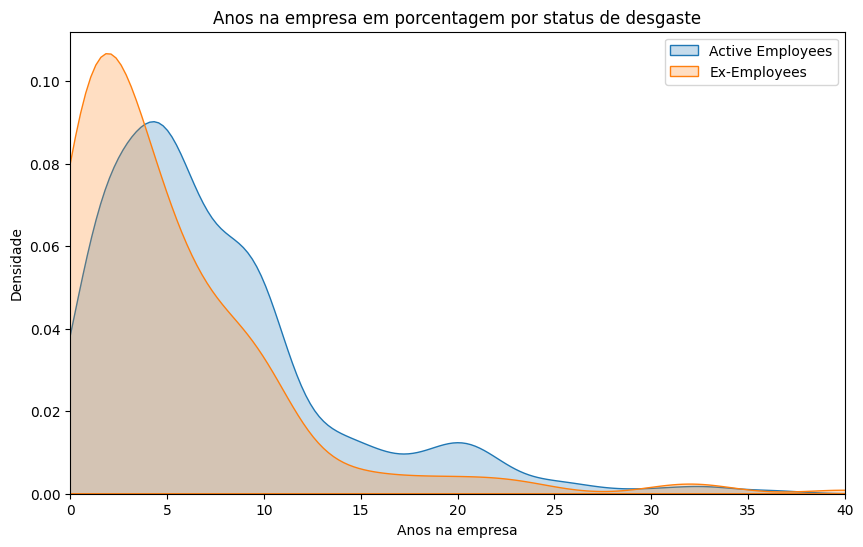

In [38]:
x1 = df_copia.loc[df_copia['Attrition'] == 'No', 'YearsAtCompany']
x2 = df_copia.loc[df_copia['Attrition'] == 'Yes', 'YearsAtCompany']

plt.figure(figsize=(10, 6))

sns.kdeplot(x1, label='Active Employees', fill=True)
sns.kdeplot(x2, label='Ex-Employees', fill=True)

plt.title('Anos na empresa em porcentagem por status de desgaste')
plt.xlabel('Anos na empresa')
plt.ylabel('Densidade')

plt.xlim(0, 40)
plt.xticks(range(0, 41, 5))

plt.legend()

plt.show()

In [39]:
print("O número de anos na função atual varia de {} a {} anos.".format(
    df_copia['YearsInCurrentRole'].min(), df_copia['YearsInCurrentRole'].max()))

O número de anos na função atual varia de 0 a 18 anos.


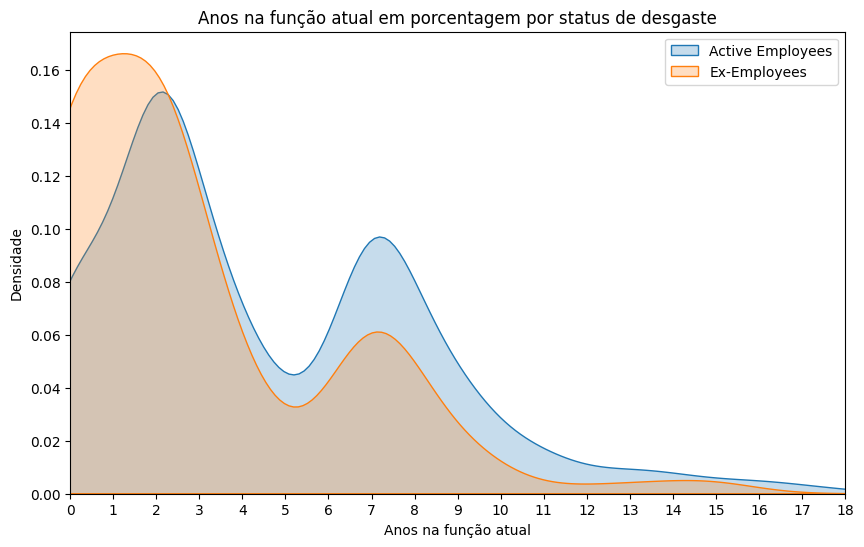

In [40]:
x1 = df_copia.loc[df_copia['Attrition'] == 'No', 'YearsInCurrentRole']
x2 = df_copia.loc[df_copia['Attrition'] == 'Yes', 'YearsInCurrentRole']

plt.figure(figsize=(10, 6))

sns.kdeplot(x1, label='Active Employees', fill=True)
sns.kdeplot(x2, label='Ex-Employees', fill=True)

plt.title('Anos na função atual em porcentagem por status de desgaste')
plt.xlabel('Anos na função atual')
plt.ylabel('Densidade')

plt.xlim(0, 18)
plt.xticks(range(0, 19, 1))

plt.legend()

plt.show()

In [41]:
print("O número de anos desde a última promoção varia de {} a {} anos.".format(
    df_copia['YearsSinceLastPromotion'].min(), df_copia['YearsSinceLastPromotion'].max()))

O número de anos desde a última promoção varia de 0 a 15 anos.


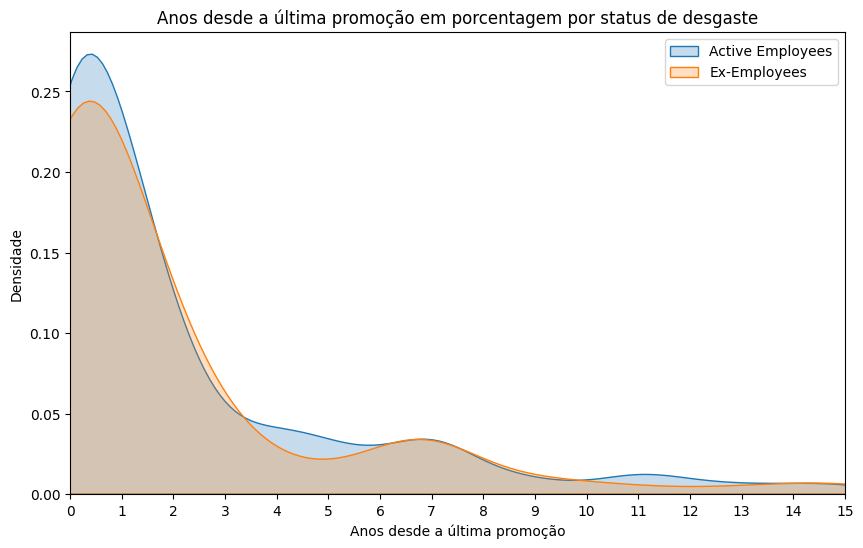

In [42]:
x1 = df_copia.loc[df_copia['Attrition'] == 'No', 'YearsSinceLastPromotion']
x2 = df_copia.loc[df_copia['Attrition'] == 'Yes', 'YearsSinceLastPromotion']

plt.figure(figsize=(10, 6))

sns.kdeplot(x=x1, label='Active Employees', fill=True)
sns.kdeplot(x=x2, label='Ex-Employees', fill=True)

plt.title('Anos desde a última promoção em porcentagem por status de desgaste')
plt.xlabel('Anos desde a última promoção')
plt.ylabel('Densidade')

plt.xlim(0, 15)
plt.xticks(range(0, 16, 1))

plt.legend()

plt.show()

In [43]:
print("O total de anos de trabalho varia de {} a {} anos.".format(
    df_copia['TotalWorkingYears'].min(), df_copia['TotalWorkingYears'].max()))

O total de anos de trabalho varia de 0 a 40 anos.


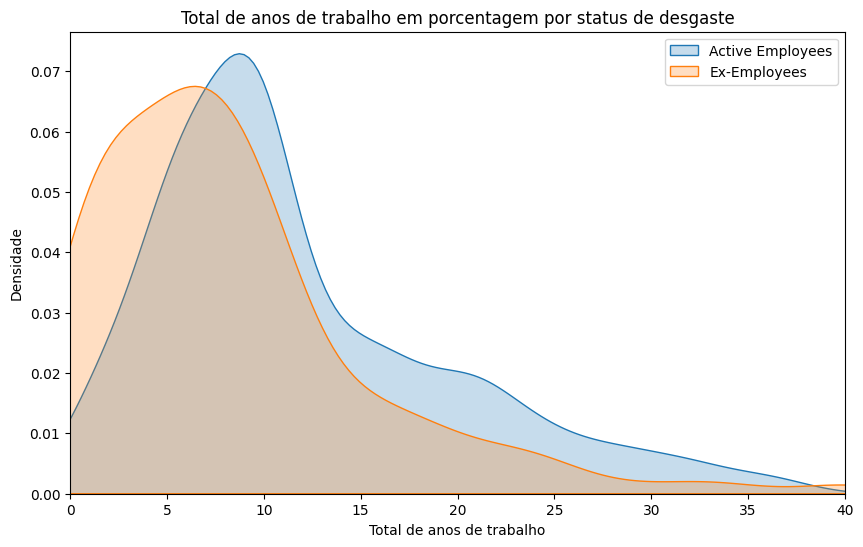

In [44]:
x1 = df_copia.loc[df_copia['Attrition'] == 'No', 'TotalWorkingYears']
x2 = df_copia.loc[df_copia['Attrition'] == 'Yes', 'TotalWorkingYears']

plt.figure(figsize=(10, 6))

sns.kdeplot(x=x1, label='Active Employees', fill=True)
sns.kdeplot(x=x2, label='Ex-Employees', fill=True)

plt.title('Total de anos de trabalho em porcentagem por status de desgaste')
plt.xlabel('Total de anos de trabalho')
plt.ylabel('Densidade')

plt.xlim(0, 40)
plt.xticks(range(0, 41, 5))

plt.legend()

plt.show()

### Anos com o mesmo gerente

In [45]:
print('Número médio de anos com gerente atual para funcionários atualmente ativos: {:.2f} milhas e ex-funcionários: {:.2f} anos'.format(
    df_copia[df_copia['Attrition'] == 'No']['YearsWithCurrManager'].mean(), df_copia[df_copia['Attrition'] == 'Yes']['YearsWithCurrManager'].mean()))

Número médio de anos com gerente atual para funcionários atualmente ativos: 4.37 milhas e ex-funcionários: 2.85 anos


In [46]:
print("O número de anos com o gerente atual varia de {} a {} anos.".format(
    df_copia['YearsWithCurrManager'].min(), df_copia['YearsWithCurrManager'].max()))

O número de anos com o gerente atual varia de 0 a 17 anos.


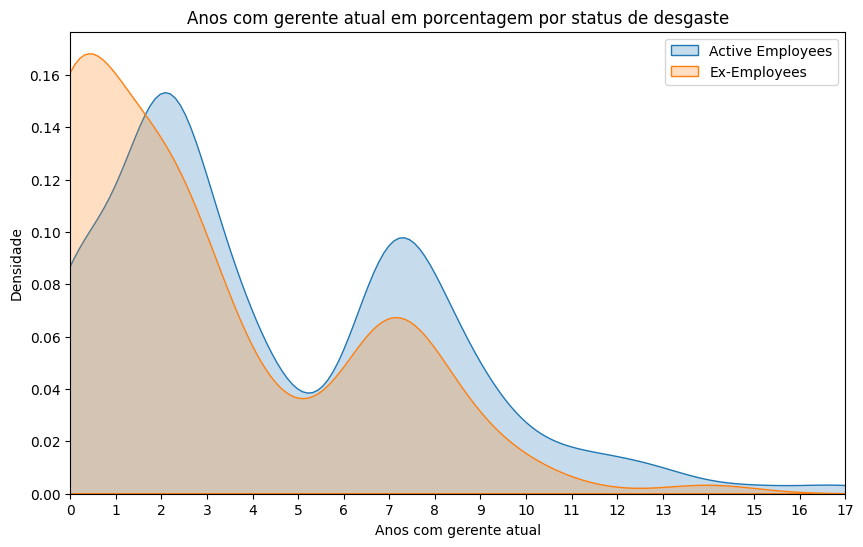

In [47]:
x1 = df_copia.loc[df_copia['Attrition'] == 'No', 'YearsWithCurrManager']
x2 = df_copia.loc[df_copia['Attrition'] == 'Yes', 'YearsWithCurrManager']

plt.figure(figsize=(10, 6))

sns.kdeplot(x=x1, label='Active Employees', fill=True)
sns.kdeplot(x=x2, label='Ex-Employees', fill=True)

plt.title('Anos com gerente atual em porcentagem por status de desgaste')
plt.xlabel('Anos com gerente atual')
plt.ylabel('Densidade')

plt.xlim(0, 17)
plt.xticks(range(0, 18, 1))

plt.legend()

plt.show()

### Equilíbrio entre vida profissional e pessoal

Uma característica relacionada ao "Equilíbrio Trabalho-Vida" foi capturada como: 1 'Ruim' 2 'Bom' 3 'Melhor' 4 'Bem Melhor'. Os dados indicam que a maior proporção normalizada de desistentes tinha um equilíbrio “ruim” entre vida profissional e pessoal.

In [48]:
df_copia['WorkLifeBalance'].value_counts()

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

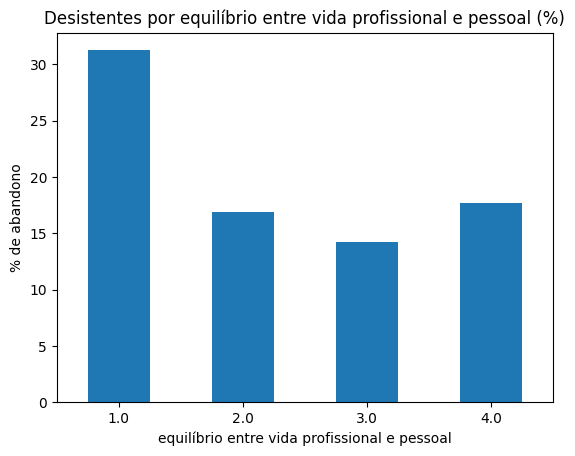

In [49]:
df_WorkLifeBalance = pd.DataFrame(columns=["WorkLifeBalance", "% of Leavers"])
i = 0
for field in list(df_copia['WorkLifeBalance'].unique()):
    ratio = df_copia[(df_copia['WorkLifeBalance'] == field) & (df_copia['Attrition'] == "Yes")].shape[0] / df_copia[df_copia['WorkLifeBalance'] == field].shape[0]
    df_WorkLifeBalance.loc[i] = (field, ratio * 100)
    i += 1

df_WLB = df_WorkLifeBalance.groupby(by="WorkLifeBalance").sum()

df_WLB.plot(kind='bar', legend=False)
plt.title('Desistentes por equilíbrio entre vida profissional e pessoal (%)')
plt.xlabel('equilíbrio entre vida profissional e pessoal')
plt.ylabel('% de abandono')
plt.xticks(rotation=0)
plt.show()

Todos os funcionários têm um compromisso de trabalho padrão de 80 horas

In [50]:
df_copia['StandardHours'].value_counts()

StandardHours
80    1470
Name: count, dtype: int64

Alguns funcionários têm compromissos de horas extras. Os dados mostram claramente que existe uma parcela significativamente maior de funcionários com OT que deixaram a empresa.

In [51]:
df_copia['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

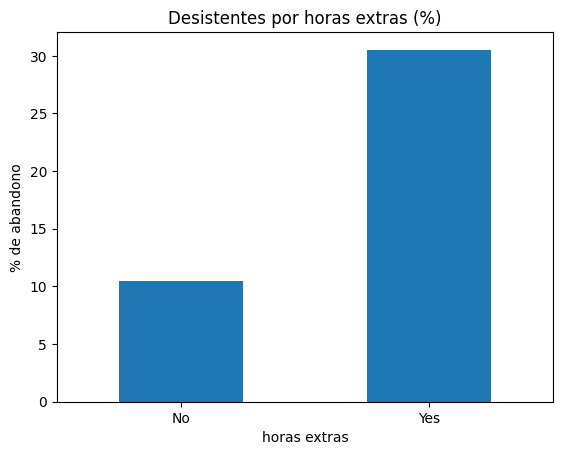

In [52]:
df_OverTime = pd.DataFrame(columns=["OverTime", "% of Leavers"])
i = 0
for field in list(df_copia['OverTime'].unique()):
    ratio = df_copia[(df_copia['OverTime'] == field) & (df_copia['Attrition'] == "Yes")].shape[0] / df_copia[df_copia['OverTime'] == field].shape[0]
    df_OverTime.loc[i] = (field, ratio * 100)
    i += 1

df_OT = df_OverTime.groupby(by="OverTime").sum()

df_OT.plot(kind='bar', legend=False)
plt.title('Desistentes por horas extras (%)')
plt.xlabel('horas extras')
plt.ylabel('% de abandono')
plt.xticks(rotation=0)
plt.show()

### Informações sobre remuneração/salário do funcionário

In [53]:
print("A taxa horária do funcionário varia de ${} a ${}.".format(
    df_copia['HourlyRate'].min(), df_copia['HourlyRate'].max()))

A taxa horária do funcionário varia de $30 a $100.


In [54]:
print("A taxa diária do funcionário varia de ${} a ${}.".format(
    df_copia['DailyRate'].min(), df_copia['DailyRate'].max()))

A taxa diária do funcionário varia de $102 a $1499.


In [55]:
print("A taxa mensal do funcionário varia de ${} a ${}.".format(
    df_copia['MonthlyRate'].min(), df_copia['MonthlyRate'].max()))

A taxa mensal do funcionário varia de $2094 a $26999.


In [56]:
print("A renda mensal do funcionário varia de ${} a ${}.".format(
    df_copia['MonthlyIncome'].min(), df_copia['MonthlyIncome'].max()))

A renda mensal do funcionário varia de $1009 a $19999.


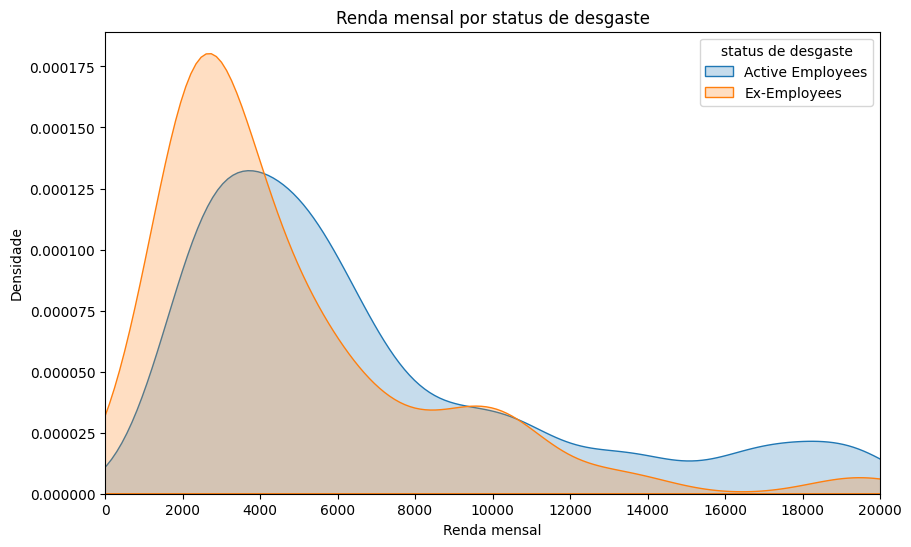

In [57]:
x1 = df_copia.loc[df_copia['Attrition'] == 'No', 'MonthlyIncome']
x2 = df_copia.loc[df_copia['Attrition'] == 'Yes', 'MonthlyIncome']

hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']

plt.figure(figsize=(10, 6))

sns.kdeplot(x1, label=group_labels[0], fill=True)
sns.kdeplot(x2, label=group_labels[1], fill=True)

plt.title('Renda mensal por status de desgaste')
plt.xlabel('Renda mensal')
plt.ylabel('Densidade')
plt.xlim([0, 20000])
plt.xticks(range(0, 20001, 2000))

plt.legend(title='status de desgaste')

plt.show()

In [58]:
print("A porcentagem de aumento salarial varia de {}% a {}%.".format(
    df_copia['PercentSalaryHike'].min(), df_copia['PercentSalaryHike'].max()))

A porcentagem de aumento salarial varia de 11% a 25%.


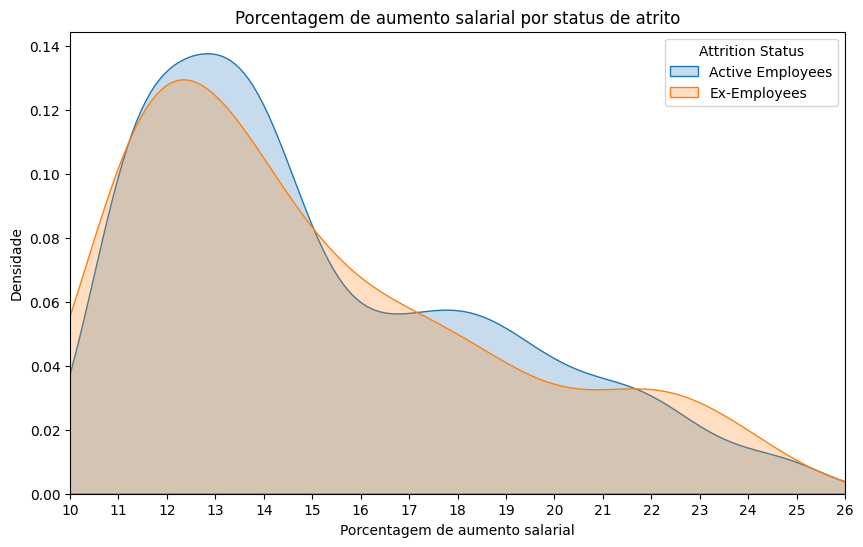

In [59]:
x1 = df_copia.loc[df_copia['Attrition'] == 'No', 'PercentSalaryHike']
x2 = df_copia.loc[df_copia['Attrition'] == 'Yes', 'PercentSalaryHike']

hist_data = [x1, x2]
group_labels = ['Active Employees', 'Ex-Employees']

plt.figure(figsize=(10, 6))

sns.kdeplot(x=x1, label=group_labels[0], fill=True)
sns.kdeplot(x=x2, label=group_labels[1], fill=True)

plt.title('Porcentagem de aumento salarial por status de atrito')
plt.xlabel('Porcentagem de aumento salarial')
plt.ylabel('Densidade')
plt.xlim([10, 26])
plt.xticks(range(10, 27, 1))

plt.legend(title='Attrition Status')

plt.show()

In [60]:
print("Os níveis de opções de ações variam de {} a {}.".format(
    df_copia['StockOptionLevel'].min(), df_copia['StockOptionLevel'].max()))

Os níveis de opções de ações variam de 0 a 3.


In [61]:
print("Porcentagem normalizada de saídas por nível de opção de compra de ações: 1: {:.2f}%, 2: {:.2f}%, 3: {:.2f}%".format(
    df_copia[(df_copia['Attrition'] == 'Yes') & (df_copia['StockOptionLevel'] == 1)
          ].shape[0] / df_copia[df_copia['StockOptionLevel'] == 1].shape[0]*100,
    df_copia[(df_copia['Attrition'] == 'Yes') & (df_copia['StockOptionLevel'] == 2)
          ].shape[0] / df_copia[df_copia['StockOptionLevel'] == 1].shape[0]*100,
    df_copia[(df_copia['Attrition'] == 'Yes') & (df_copia['StockOptionLevel'] == 3)].shape[0] / df_copia[df_copia['StockOptionLevel'] == 1].shape[0]*100))

Porcentagem normalizada de saídas por nível de opção de compra de ações: 1: 9.40%, 2: 2.01%, 3: 2.52%


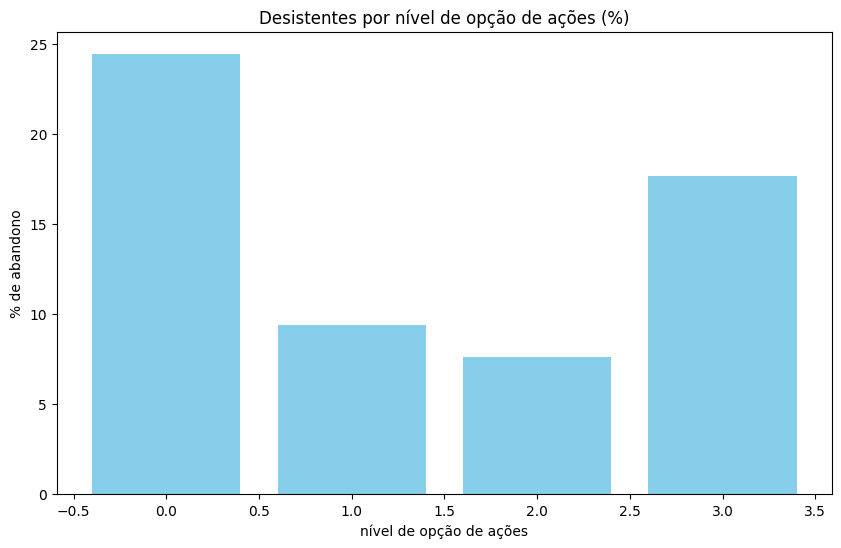

In [62]:
df_StockOptionLevel = pd.DataFrame(columns=["StockOptionLevel", "% of Leavers"])
i = 0
for field in list(df_copia['StockOptionLevel'].unique()):
    ratio = df_copia[(df_copia['StockOptionLevel'] == field) & (df_copia['Attrition'] == "Yes")].shape[0] / df_copia[df_copia['StockOptionLevel'] == field].shape[0]
    df_StockOptionLevel.loc[i] = (field, ratio * 100)
    i += 1

df_SOL = df_StockOptionLevel.groupby(by="StockOptionLevel").sum()

plt.figure(figsize=(10, 6))
plt.bar(df_SOL.index, df_SOL['% of Leavers'], color='skyblue')

plt.title('Desistentes por nível de opção de ações (%)')
plt.xlabel('nível de opção de ações')
plt.ylabel('% de abandono')

plt.show()

### Informações sobre satisfação e desempenho dos funcionários

A Satisfação com o Ambiente de Trabalho foi capturada como: 1 'Baixo', 2 'Médio', 3 'Alto', 4 'Muito Alto'. A proporção de funcionários que saem diminui à medida que a pontuação de Satisfação com o Ambiente de Trabalho aumenta.

In [63]:
df_copia['EnvironmentSatisfaction'].value_counts()

EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64

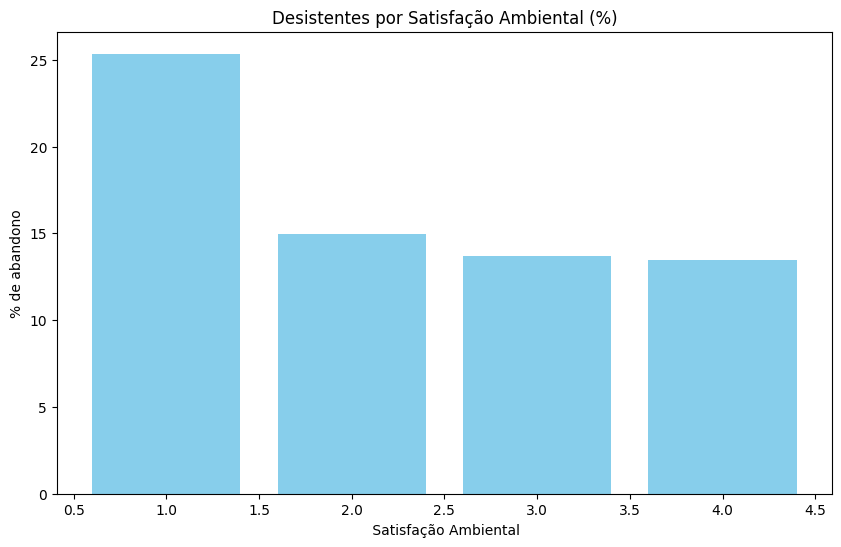

In [64]:
df_EnvironmentSatisfaction = pd.DataFrame(columns=["EnvironmentSatisfaction", "% of Leavers"])
i = 0
for field in list(df_copia['EnvironmentSatisfaction'].unique()):
    ratio = df_copia[(df_copia['EnvironmentSatisfaction'] == field) & (df_copia['Attrition'] == "Yes")].shape[0] / df_copia[df_copia['EnvironmentSatisfaction'] == field].shape[0]
    df_EnvironmentSatisfaction.loc[i] = (field, ratio * 100)
    i += 1

df_Env = df_EnvironmentSatisfaction.groupby(by="EnvironmentSatisfaction").sum()

plt.figure(figsize=(10, 6))
plt.bar(df_Env.index, df_Env['% of Leavers'], color='skyblue')

plt.title('Desistentes por Satisfação Ambiental (%)')
plt.xlabel(' Satisfação Ambiental')
plt.ylabel('% de abandono')

plt.show()

 A satisfação no trabalho foi capturada como: 1 'Baixa' 2 'Média' 3 'Alta' 4 'Muito alta'

In [65]:
df_copia['JobSatisfaction'].value_counts()

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

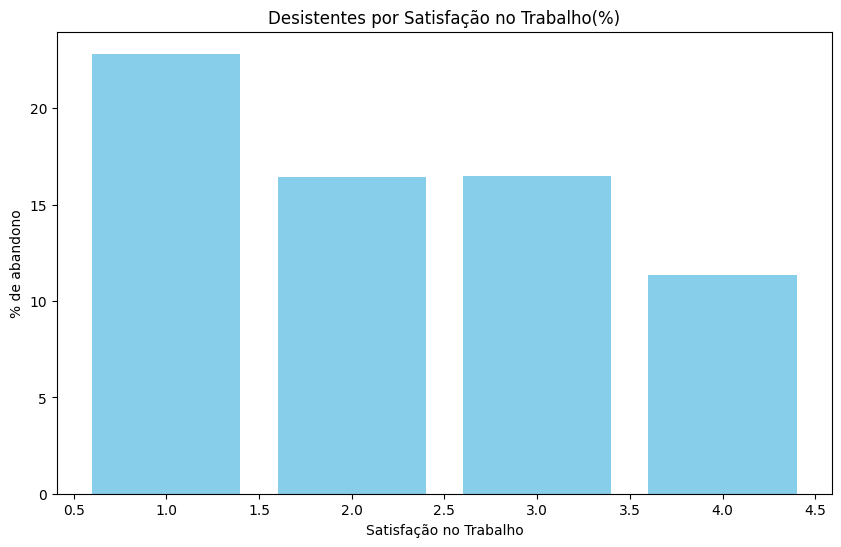

In [66]:
df_JobSatisfaction = pd.DataFrame(columns=["JobSatisfaction", "% of Leavers"])
i = 0
for field in list(df_copia['JobSatisfaction'].unique()):
    ratio = df_copia[(df_copia['JobSatisfaction'] == field) & (df_copia['Attrition'] == "Yes")].shape[0] / df_copia[df_copia['JobSatisfaction'] == field].shape[0]
    df_JobSatisfaction.loc[i] = (field, ratio * 100)
    i += 1

df_JS = df_JobSatisfaction.groupby(by="JobSatisfaction").sum()

plt.figure(figsize=(10, 6))
plt.bar(df_JS.index, df_JS['% of Leavers'], color='skyblue')

plt.title('Desistentes por Satisfação no Trabalho(%)')
plt.xlabel('Satisfação no Trabalho')
plt.ylabel('% de abandono')

plt.show()

A satisfação no relacionamento foi capturada como: 1 'Baixa' 2 'Média' 3 'Alta' 4 'Muito alta'

In [67]:
df_copia['RelationshipSatisfaction'].value_counts()

RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64

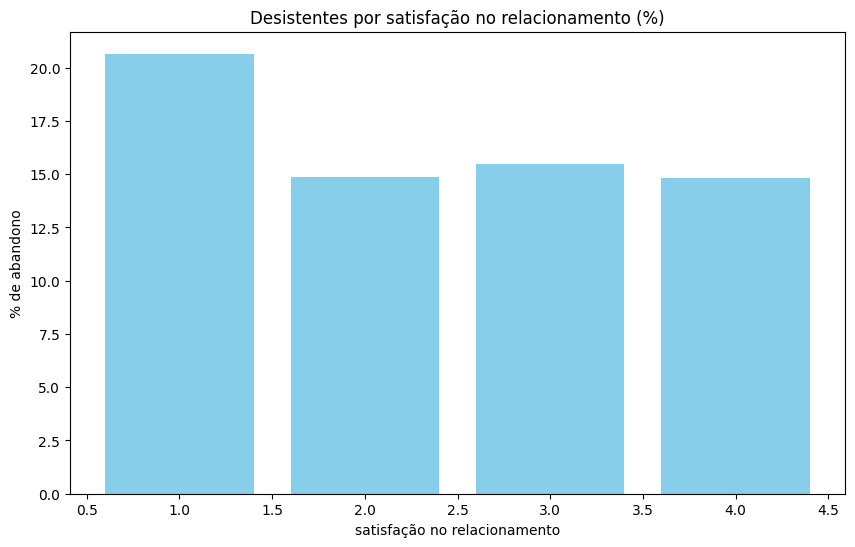

In [68]:
df_RelationshipSatisfaction = pd.DataFrame(columns=["RelationshipSatisfaction", "% of Leavers"])
i = 0
for field in list(df_copia['RelationshipSatisfaction'].unique()):
    ratio = df_copia[(df_copia['RelationshipSatisfaction'] == field) & (df_copia['Attrition'] == "Yes")].shape[0] / df_copia[df_copia['RelationshipSatisfaction'] == field].shape[0]
    df_RelationshipSatisfaction.loc[i] = (field, ratio * 100)
    i += 1

df_RS = df_RelationshipSatisfaction.groupby(by="RelationshipSatisfaction").sum()

plt.figure(figsize=(10, 6))
plt.bar(df_RS.index, df_RS['% of Leavers'], color='skyblue')

plt.title('Desistentes por satisfação no relacionamento (%)')
plt.xlabel('satisfação no relacionamento')
plt.ylabel('% de abandono')

plt.show()


A classificação de desempenho do funcionário foi capturada como: 1 'Baixo' 2 'Bom' 3 'Excelente' 4 'Marcante'

In [69]:
df_copia['PerformanceRating'].value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

In [70]:
print("Porcentagem normalizada de saídas por nível de opção de ações: 3: {:.2f}%, 4: {:.2f}%".format(
    df_copia[(df_copia['Attrition'] == 'Yes') & (df_copia['PerformanceRating'] == 3)
          ].shape[0] / df_copia[df_copia['StockOptionLevel'] == 1].shape[0]*100,
    df_copia[(df_copia['Attrition'] == 'Yes') & (df_copia['PerformanceRating'] == 4)].shape[0] / df_copia[df_copia['StockOptionLevel'] == 1].shape[0]*100))

Porcentagem normalizada de saídas por nível de opção de ações: 3: 33.56%, 4: 6.21%


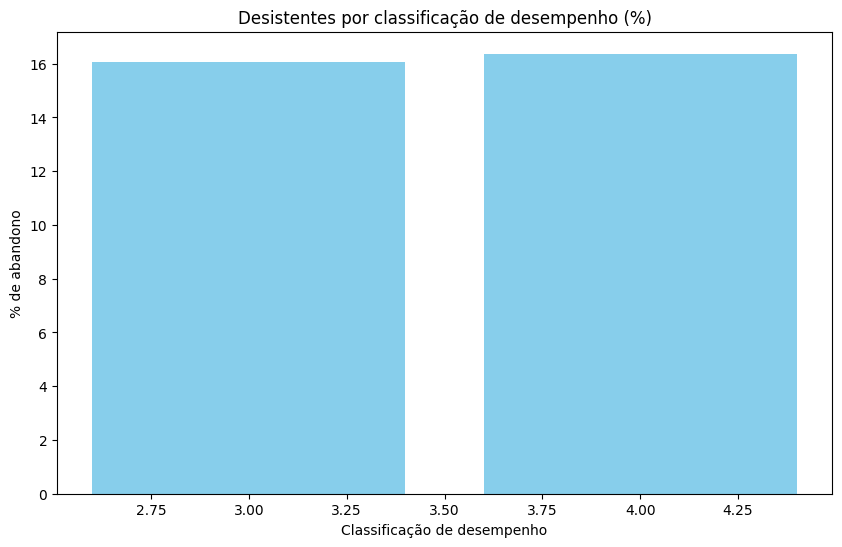

In [71]:
df_PerformanceRating = pd.DataFrame(columns=["PerformanceRating", "% of Leavers"])
i = 0
for field in list(df_copia['PerformanceRating'].unique()):
    ratio = df_copia[(df_copia['PerformanceRating'] == field) & (df_copia['Attrition'] == "Yes")].shape[0] / df_copia[df_copia['PerformanceRating'] == field].shape[0]
    df_PerformanceRating.loc[i] = (field, ratio * 100)
    i += 1

df_PR = df_PerformanceRating.groupby(by="PerformanceRating").sum()

plt.figure(figsize=(10, 6))
plt.bar(df_PR.index, df_PR['% of Leavers'], color='skyblue')

plt.title('Desistentes por classificação de desempenho (%)')
plt.xlabel('Classificação de desempenho')
plt.ylabel('% de abandono')

plt.show()

### Target Variable: Attrition

O objetivo deste problema de Aprendizado de Máquina é o atributo 'Attrition' (Desligamento). Estamos tentando prever o valor do atributo 'Attrition' utilizando outros atributos relacionados à história pessoal e profissional do funcionário.

O desgaste indica se o funcionário está atualmente ativo ('Não') ou saiu da empresa ('Sim')

In [72]:
df_copia['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [73]:
print("A porcentagem de funcionários atuais é {:.1f}% e de ex-funcionários é: {:.1f}%".format(
    df_copia[df_copia['Attrition'] == 'No'].shape[0] / df_copia.shape[0]*100,
    df_copia[df_copia['Attrition'] == 'Yes'].shape[0] / df_copia.shape[0]*100))

A porcentagem de funcionários atuais é 83.9% e de ex-funcionários é: 16.1%


In [74]:
df_copia['Attrition'].iplot(kind='hist', xTitle='Attrition',
                         yTitle='count', title='Attrition Distribution')

 * Como mostrado no gráfico acima, vemos que este é um problema de classes desbalanceadas. De fato, a porcentagem de Funcionários Ativos em nosso conjunto de dados é de 83,9% e a porcentagem de Ex-funcionários é de 16,1%.

 * Os algoritmos de aprendizado de máquina geralmente funcionam melhor quando o número de instâncias de cada classe é aproximadamente igual. Teremos que abordar esse desequilíbrio do atributo-alvo antes de implementar nossos algoritmos de aprendizado de máquina.

### Correlation

Vamos dar uma olhada em algumas das correlações mais significativas. Vale lembrar que os coeficientes de correlação medem apenas correlações lineares.

In [75]:
df_HR_trans = df_copia.copy()

df_HR_trans['Target'] = df_HR_trans['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

df_HR_trans = df_HR_trans.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

df_HR_trans = pd.get_dummies(df_HR_trans, drop_first=True)

correlations = df_HR_trans.corr()['Target'].sort_values()

print('Correlações mais positivas: \n', correlations.tail(5))
print('\nCorrelações mais negativas: \n', correlations.head(5))

Correlações mais positivas: 
 BusinessTravel_Travel_Frequently    0.115143
JobRole_Sales Representative        0.157234
MaritalStatus_Single                0.175419
OverTime_Yes                        0.246118
Target                              1.000000
Name: Target, dtype: float64

Correlações mais negativas: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64



Vamos traçar um mapa de calor para visualizar a correlação entre o atrito e esses fatores

<Axes: >

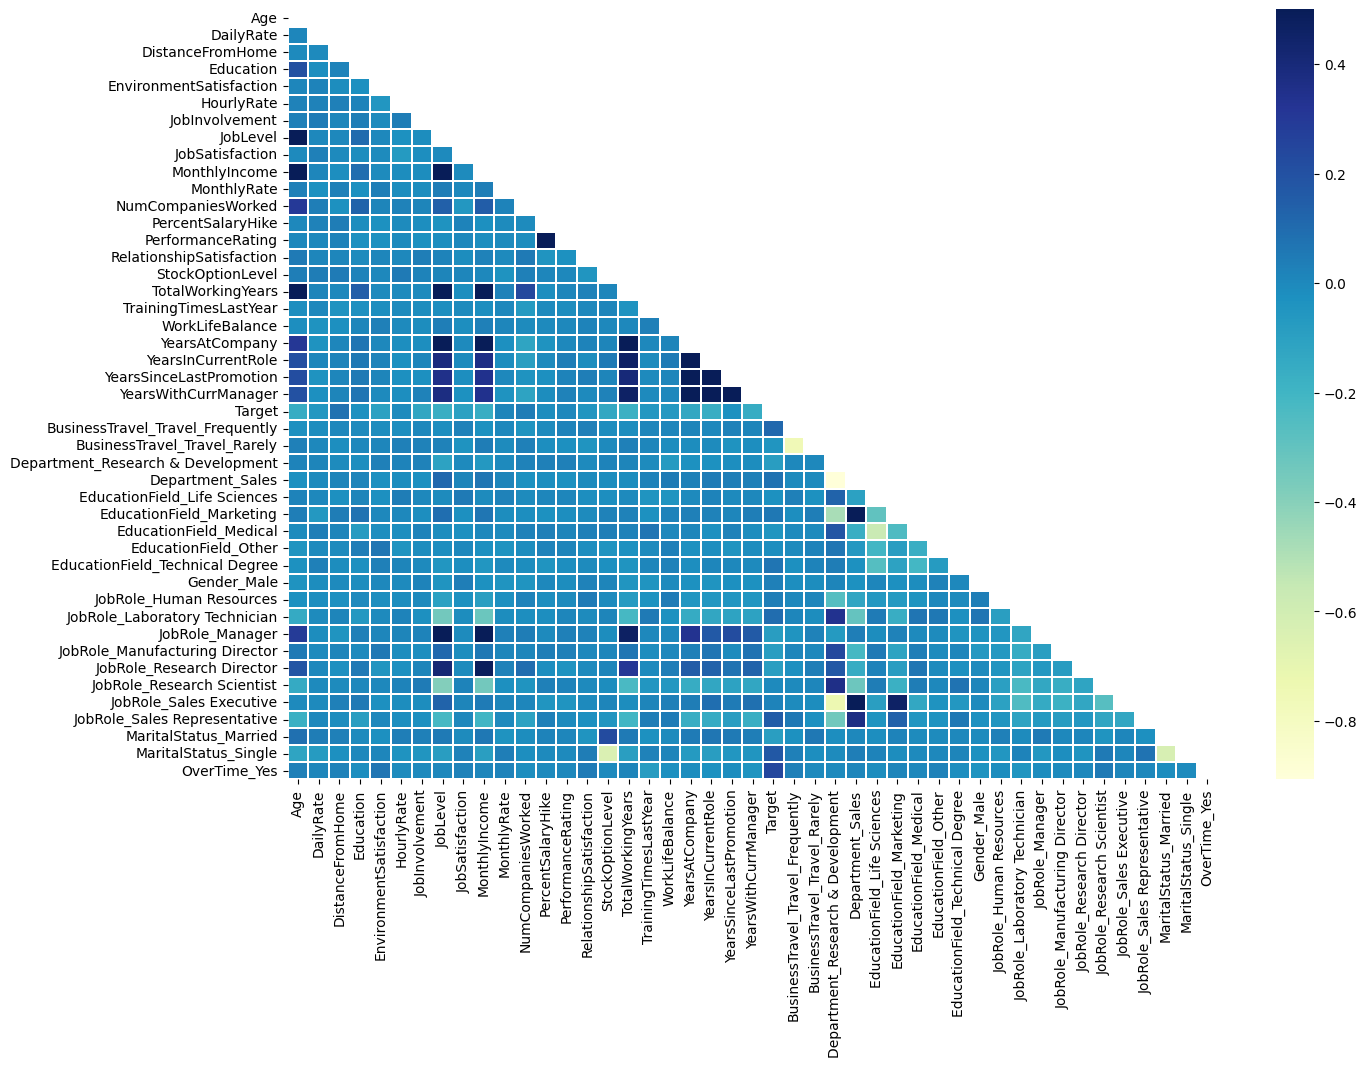

In [76]:
corr = df_HR_trans.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            linewidths=.2, cmap="YlGnBu")

Como mostrado acima, "Taxa Mensal", "Número de Empresas Trabalhadas" e "Distância de Casa" são positivamente correlacionadas com Desligamento; enquanto "Total de Anos Trabalhados", "Nível de Cargo" e "Anos no Cargo Atual" são negativamente correlacionadas com Desligamento.

## Conclusões da EDA

Vamos resumir as descobertas desta Análise Exploratória de Dados (EDA):

 * O conjunto de dados não apresenta valores ausentes ou errôneos, e todas as características estão no tipo de dado correto.
 * As correlações positivas mais fortes com a variável alvo são: Avaliação de Desempenho, Taxa Mensal, Número de Empresas Trabalhadas e Distância de Casa.
 * As correlações negativas mais fortes com a variável alvo são: Total de Anos de Trabalho, Nível de Trabalho, Anos na Função Atual e Renda Mensal.
 * O conjunto de dados é desequilibrado, com a maioria das observações descrevendo Funcionários Ativos Atualmente.
 * Várias características (ou colunas) são redundantes para nossa análise, a saber: EmployeeCount, EmployeeNumber, StandardHours e Over18.


Outras observações incluem:

 * Funcionários solteiros mostram a maior proporção de evasão, em comparação com seus colegas casados e divorciados.
 * Cerca de 10% dos que deixaram a empresa saíram ao alcançar o aniversário de 2 anos na empresa.
 * Funcionários leais com salários mais altos e mais responsabilidades mostram uma proporção menor de evasão em comparação com seus colegas.
 * Pessoas que moram mais longe do trabalho mostram uma maior proporção de evasão em comparação com seus colegas.
 * Pessoas que viajam frequentemente mostram uma maior proporção de evasão em comparação com seus colegas.
 * Pessoas que precisam trabalhar horas extras mostram uma maior proporção de evasão em comparação com seus colegas.
 * Funcionários que trabalham como Representantes de Vendas mostram uma porcentagem significativa de evasão no conjunto de dados analisado.
 * Funcionários que já trabalharam em várias empresas anteriormente (já "pularam" entre locais de trabalho) mostram uma maior proporção de evasão em comparação com seus colegas.

### Pre-processing Pipeline

Nesta seção, realizamos etapas de pré-processamento de dados para preparar os conjuntos de dados para implementação do algoritmo de aprendizado de máquina.

### Encoding

Os algoritmos de aprendizado de máquina geralmente só podem ter valores numéricos como suas variáveis preditoras. Portanto, a Codificação de Rótulo se torna necessária, pois codifica rótulos categóricos com valores numéricos. Para evitar a introdução de importância de atributos para atributos categóricos com um grande número de valores únicos, usaremos tanto a Codificação de Rótulo quanto a Codificação One-Hot, como mostrado abaixo.

In [77]:
le = LabelEncoder()

In [78]:
print(df_copia.shape)
df_copia.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [79]:
le_count = 0
for col in df_copia.columns[1:]:
    if df_copia[col].dtype == 'object':
        if len(list(df_copia[col].unique())) <= 2:
            le.fit(df_copia[col])
            df_copia[col] = le.transform(df_copia[col])
            le_count += 1
print('{} colunas foram codificadas.'.format(le_count))

4 colunas foram codificadas.


In [80]:
df_copia = pd.get_dummies(df_copia, drop_first=True)

O dataframe resultante possui 49 colunas para 1.470 funcionários.

In [81]:
print(df_copia.shape)
df_copia.head()

(1470, 49)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0,False,True,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2,False,True,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False


### Feature Scaling

O Escalonamento de Atributos usando MinMaxScaler essencialmente reduz o intervalo de modo que ele fique entre 0 e n. Os algoritmos de Aprendizado de Máquina funcionam melhor quando as variáveis numéricas de entrada estão em uma escala similar. Neste caso, estamos escalonando entre 0 e 5.

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
df_col = list(df_copia.columns)
df_col.remove('Attrition')
for col in df_col:
    df_copia[col] = df_copia[col].astype(float)
    df_copia[[col]] = scaler.fit_transform(df_copia[[col]])
df_copia['Attrition'] = pd.to_numeric(df_copia['Attrition'], downcast='float')
df_copia.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,1.0,3.579098,0.000000,1.25,0.0,0.000000,1.666667,0.0,4.571429,3.333333,1.25,5.000000,1.312270,3.490263,4.444444,0.0,5.0,0.000000,0.0,0.000000,0.0,0.000000,1.000,0.0,0.000000,0.75,1.111111,0.000000,1.470588,0.0,5.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.0,0.633500,1.250000,0.00,0.0,0.002419,3.333333,5.0,2.214286,1.666667,1.25,1.666667,1.085045,4.580004,0.555556,0.0,0.0,4.285714,5.0,5.000000,0.0,1.666667,1.250,2.5,3.333333,1.25,1.944444,0.333333,2.058824,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,1.0,4.549034,0.178571,1.25,0.0,0.007257,5.000000,5.0,4.428571,1.666667,0.00,3.333333,0.284623,0.060630,3.333333,0.0,5.0,1.428571,0.0,1.666667,0.0,0.000000,0.875,2.5,3.333333,0.00,0.000000,0.000000,0.000000,0.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,0.0,4.617037,0.357143,3.75,0.0,0.009676,5.000000,0.0,1.857143,3.333333,0.00,3.333333,0.500263,4.229070,0.555556,0.0,5.0,0.000000,0.0,3.333333,0.0,0.000000,1.000,2.5,3.333333,1.00,1.944444,1.000000,0.000000,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,0.0,1.750179,0.178571,0.00,0.0,0.014514,0.000000,5.0,0.714286,3.333333,0.00,1.666667,0.647446,2.918691,5.000000,0.0,0.0,0.357143,0.0,5.000000,0.0,1.666667,0.750,2.5,3.333333,0.25,0.555556,0.666667,0.588235,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [83]:
print('Tamanho do conjunto de dados totalmente codificado: {}'. format(df_copia.shape))

Tamanho do conjunto de dados totalmente codificado: (1470, 49)


### Dividindo dados em conjuntos de treinamento e teste

Antes de implementar ou aplicar qualquer algoritmo de aprendizado de máquina, devemos dissociar os conjuntos de dados de treinamento e teste de nosso dataframe mestre.

In [84]:
target = df_copia['Attrition'].copy()

In [85]:
type(target)

pandas.core.series.Series

In [86]:
# let's remove the target feature and redundant features from the dataset
df_copia.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber',
            'StandardHours', 'Over18'], axis=1, inplace=True)
print('O tamanho do conjunto de dados completo é: {}'.format(df_copia.shape))

O tamanho do conjunto de dados completo é: (1470, 44)


In [87]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df_copia,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)
print("Número de transações no dataset X_train:", X_train.shape)
print("Número de transações no dataset y_train:", y_train.shape)
print("Número de transações no dataset X_test:", X_test.shape)
print("Número de transações no dataset y_test:", y_test.shape)

Número de transações no dataset X_train: (1102, 44)
Número de transações no dataset y_train: (1102,)
Número de transações no dataset X_test: (368, 44)
Número de transações no dataset y_test: (368,)


### Criando os modelos de Machine Learning

### Modelos base

Vamos começar utilizando uma variedade de algoritmos de referência (usando hiperparâmetros padrões) antes de passarmos para soluções mais sofisticadas. Os algoritmos considerados nesta seção são: Regressão Logística, Floresta Aleatória, SVM, KNN, Árvore de Decisão e Naive Bayes Gaussiano.

In [88]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

Vamos avaliar cada modelo por vez e fornecer pontuações de precisão e desvio padrão

In [89]:
acc_results = []
auc_results = []
names = []
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=7)

    cv_acc_results = model_selection.cross_val_score(
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,81.64,6.43,76.51,4.36
1,Random Forest,80.03,5.55,85.12,2.86
2,SVM,77.63,5.71,84.30,2.66
5,Gaussian NB,75.11,5.02,66.33,4.99
3,KNN,66.22,5.32,84.67,2.33
4,Decision Tree Classifier,65.37,6.30,80.31,4.05


A Acurácia de Classificação é o número de predições corretas dividido pelo total de predições feitas. É a métrica de avaliação mais comum para problemas de classificação. No entanto, é frequentemente mal utilizada, pois é realmente adequada apenas quando há um número igual de observações em cada classe e todas as predições e erros de predição são igualmente importantes. Esse não é o caso deste projeto, portanto, uma métrica de pontuação diferente pode ser mais adequada.

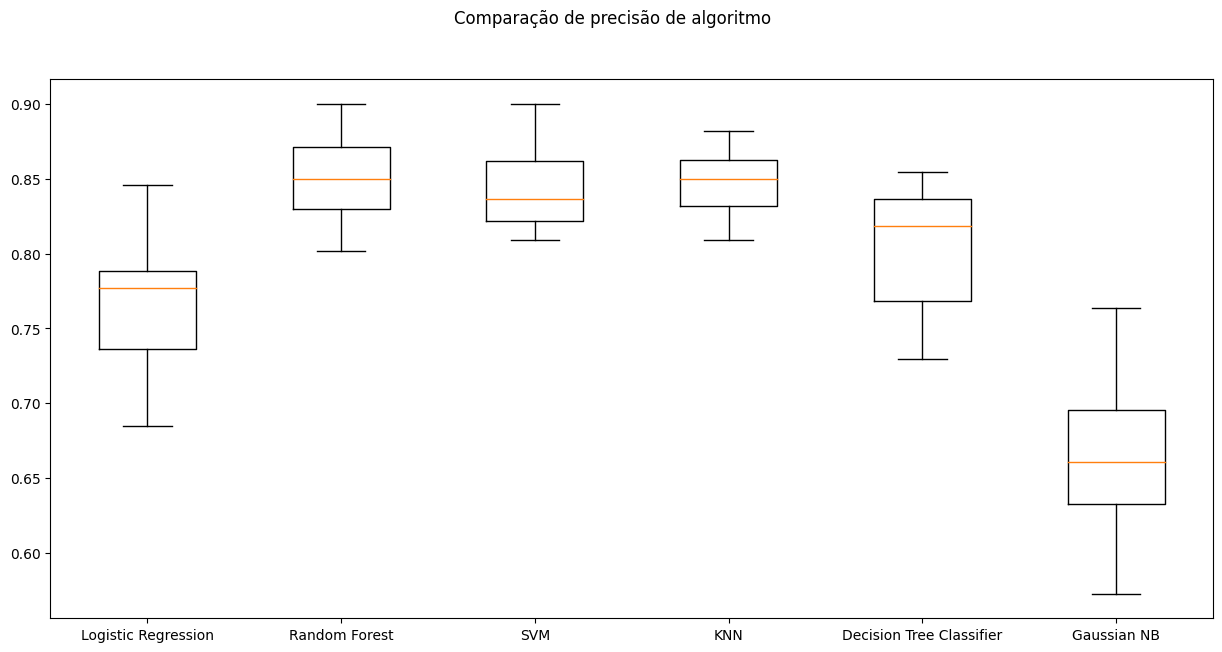

In [90]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Comparação de precisão de algoritmo')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

A Área sob a Curva ROC (ou AUC, na sigla em inglês) é uma métrica de desempenho para problemas de classificação binária. A AUC representa a capacidade de um modelo de discriminar entre classes positivas e negativas. Uma área de 1,0 representa um modelo que fez todas as previsões perfeitamente. Uma área de 0,5 representa um modelo tão bom quanto o acaso.

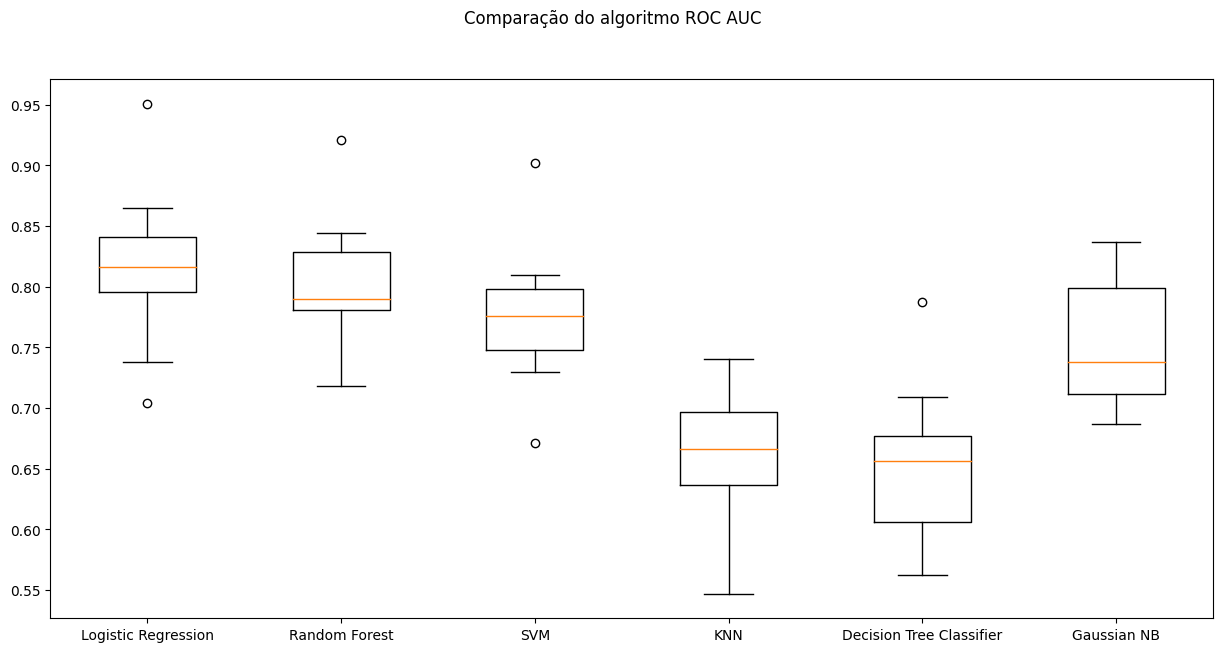

In [91]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Comparação do algoritmo ROC AUC')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

Com base em nossa análise comparativa de AUC ROC, a Regressão Logística e a Floresta Aleatória apresentam as maiores médias de pontuação AUC. Selecionaremos esses dois algoritmos para análise mais aprofundada. Veja abaixo mais detalhes sobre esses dois algoritmos.

A Regressão Logística é um algoritmo de classificação de Aprendizado de Máquina utilizado para prever a probabilidade de uma variável dependente categórica. A Regressão Logística é um algoritmo de classificação que não é tão sofisticado quanto os métodos de ensemble ou árvores de decisão impulsionadas discutidos abaixo. Portanto, ele nos fornece um bom ponto de referência.

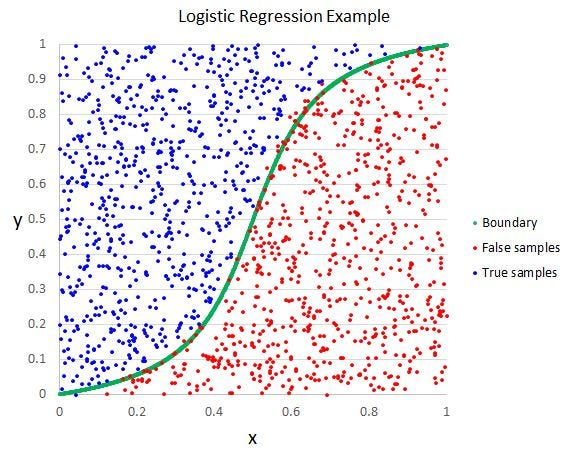

Floresta Aleatória é um método de aprendizado de máquina popular e versátil capaz de resolver tanto regressão quanto classificação. A Floresta Aleatória é um tipo de aprendizado de conjunto, pois se baseia em um conjunto de árvores de decisão. Ela agrega Árvores de Classificação (ou Regressão). Uma árvore de decisão é composta por uma série de decisões que podem ser usadas para classificar uma observação em um conjunto de dados.

A Floresta Aleatória ajusta um número de classificadores de árvore de decisão em várias subamostras do conjunto de dados e utiliza média para melhorar a precisão preditiva e controlar o overfitting. A Floresta Aleatória pode lidar com um grande número de características e é útil para estimar quais de suas variáveis são importantes nos dados subjacentes modelados.

### Regressão logistica

Vamos analisar mais de perto o uso do algoritmo de Regressão Logística. Vou utilizar a Validação Cruzada de 10 Folds para treinar nosso Modelo de Regressão Logística e estimar sua pontuação AUC.

In [92]:
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=7)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced",
                             random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (STD): 0.82 (0.06)


### Fine-tuning

GridSearchCV permite ajustar hiperparâmetros buscando entre valores específicos de parâmetros para um estimador.

In [93]:
param_grid = {'C': np.arange(1e-03, 2, 0.01)}
log_gs = GridSearchCV(LogisticRegression(solver='liblinear',
                                         class_weight="balanced",
                                         random_state=7),
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("Melhores parâmetros: " + str(log_gs.best_estimator_))
print("Melhores parâmetros: " + str(log_gs.best_params_))
print('Melhor pontuação:', log_gs.best_score_)
print('='*20)

Melhores parâmetros: LogisticRegression(C=0.10099999999999998, class_weight='balanced',
                   random_state=7, solver='liblinear')
Melhores parâmetros: {'C': 0.10099999999999998}
Melhor pontuação: 0.8154962538233308


Como mostrado acima, os resultados do GridSearchCV forneceram um hiperparâmetro otimizado utilizando a métrica ROC_AUC.

Evaluation/ avaliação

Text(0.5, 427.9555555555555, 'Etiqueta prevista')

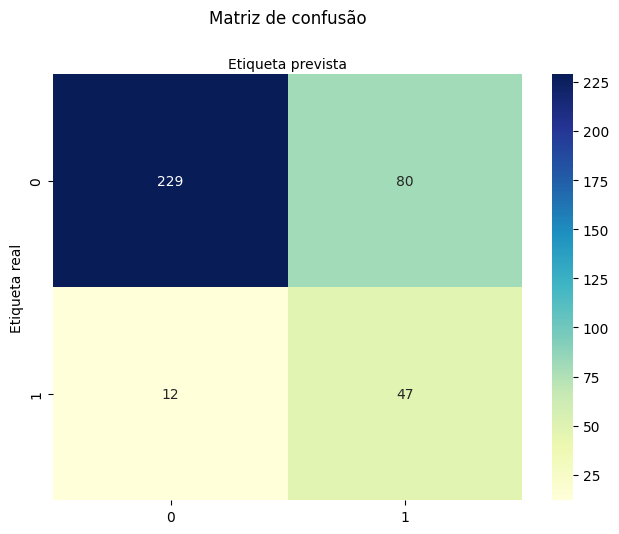

In [94]:
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusão', y=1.1)
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta prevista')

In [95]:
print('Precisão do classificador de regressão logística no conjunto de teste: {:.2f}'.format(log_opt.score(X_test, y_test)*100))

Precisão do classificador de regressão logística no conjunto de teste: 75.00


A Matriz de Confusão está nos dizendo que temos 229+47 predições corretas e 78+12 predições incorretas. Em outras palavras, uma acurácia de 75,00%.

In [96]:
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.95      0.74      0.83       309
         1.0       0.37      0.80      0.51        59

    accuracy                           0.75       368
   macro avg       0.66      0.77      0.67       368
weighted avg       0.86      0.75      0.78       368



Em vez de obter previsões binárias do alvo (0 ou 1), uma probabilidade pode ser associada ao alvo previsto. A saída fornece um primeiro índice referente à probabilidade de os dados pertencerem à classe 0 (funcionário não deixando a empresa) e o segundo refere-se à probabilidade de os dados pertencerem à classe 1 (funcionário deixando a empresa). A pontuação AUC resultante é de 0,857, que é superior à melhor pontuação durante a etapa de otimização.

In [97]:
log_opt.fit(X_train, y_train)
probs = log_opt.predict_proba(X_test)
probs = probs[:, 1]
logit_roc_auc = roc_auc_score(y_test, probs)
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.857


### Random Forest Classifier

Vamos analisar mais de perto o uso do algoritmo Floresta Aleatória. Vou ajustar os hiperparâmetros do algoritmo Floresta Aleatória por meio de validação cruzada utilizando a pontuação AUC.

Fine-tuning

In [98]:
rf_classifier = RandomForestClassifier(class_weight="balanced", random_state=7)

param_grid = {
    'n_estimators': [50, 100, 150],
    'min_samples_split': [2, 6, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [10, 20, 30]
}

grid_obj = GridSearchCV(rf_classifier,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("Melhores parâmetros: " + str(grid_obj.best_estimator_))
print("Melhores parâmetros: " + str(grid_obj.best_params_))
print('Melhor pontuação:', grid_obj.best_score_)
print('='*20)

Melhores parâmetros: RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=10, n_estimators=50, random_state=7)
Melhores parâmetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Melhor pontuação: 0.788351445455851


O Random Forest nos permite saber quais características são mais importantes para prever o atributo-alvo ("attrition" neste projeto). Abaixo, plotamos as características por sua importância.

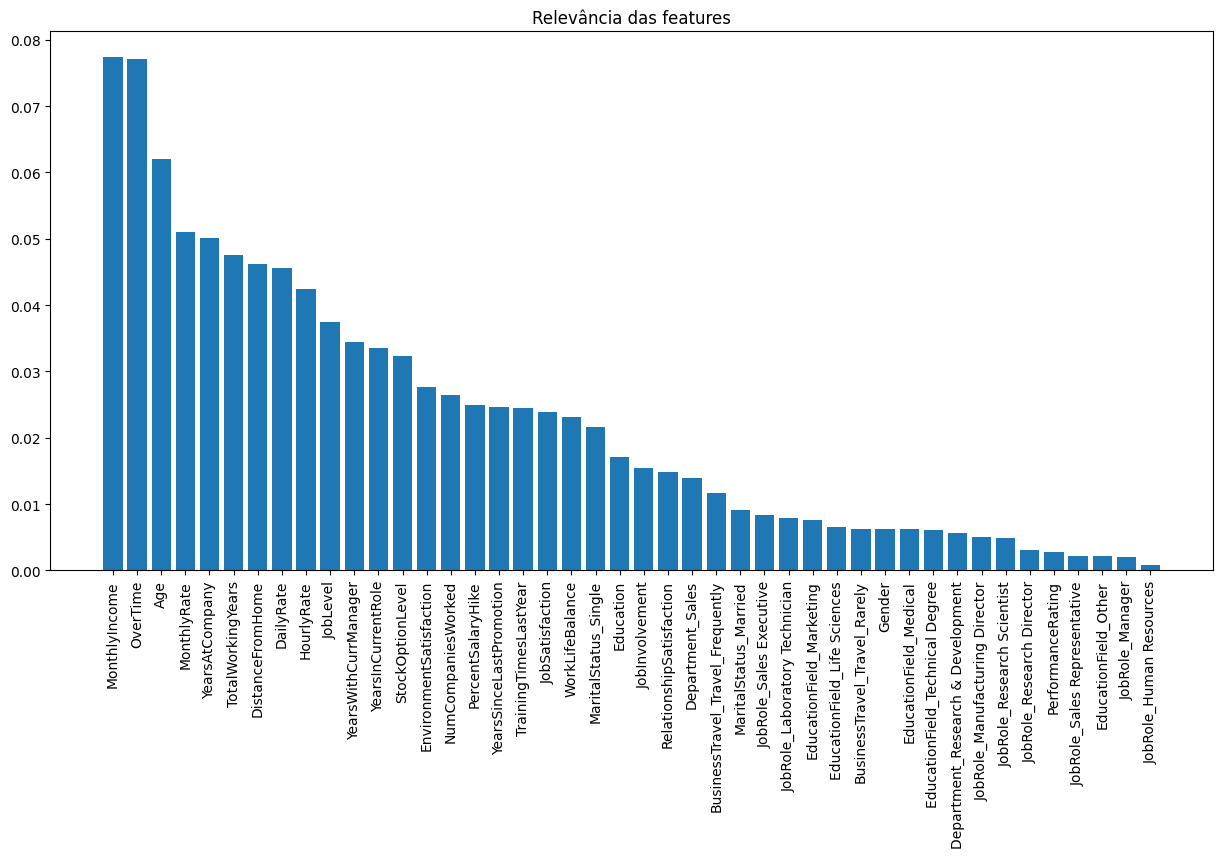

In [99]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Relevância das features") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

A Floresta Aleatória nos ajudou a identificar os 10 indicadores mais importantes (classificados na tabela abaixo) como: Renda Mensal/ *MonthlyIncome*, Horas Extras/ *OverTime*, Idade/ *Age*, Taxa Mensal/ *MonthlyRate*, Distância de Casa/ *DistanceFromHome*, Taxa Diária/ *DailyRate*, Total de Anos Trabalhados/ *TotalWorkingYears*, Anos na Empresa/ *YearsAtCompany*, Taxa Horária/ *HourlyRate*, Anos com Gerente Atual/ *YearsWithCurrManager*.


In [100]:
importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(44):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,MonthlyIncome,0.077403
1,OverTime,0.077143
2,Age,0.062019
3,MonthlyRate,0.050984
4,YearsAtCompany,0.050178
5,TotalWorkingYears,0.047606
6,DistanceFromHome,0.046231
7,DailyRate,0.045616
8,HourlyRate,0.042414
9,JobLevel,0.037390


Evaluation

Text(0.5, 427.9555555555555, 'Etiqueta predita')

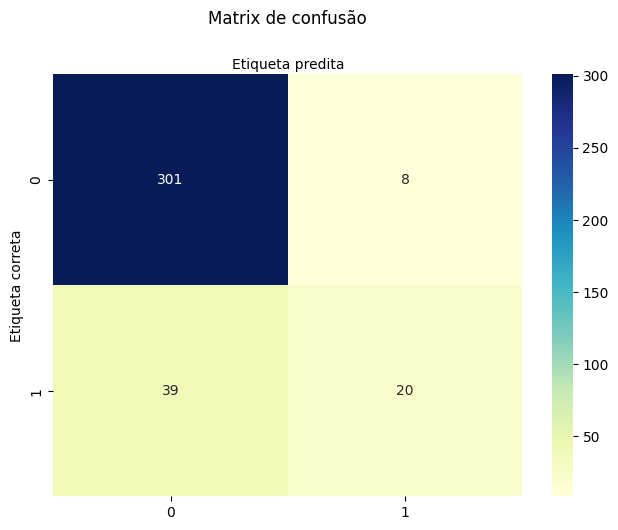

In [101]:
cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrix de confusão', y=1.1)
plt.ylabel('Etiqueta correta')
plt.xlabel('Etiqueta predita')

In [102]:
print('Precisão do classificador de regressão Random Forest no conjunto de teste: {:.2f}'.format(rf_opt.score(X_test, y_test)*100))

Precisão do classificador de regressão Random Forest no conjunto de teste: 87.23


A Matriz de Confusão está nos dizendo que temos 301+20 predições corretas e 1+52 predições incorretas. Em outras palavras, uma acurácia de 87,23%.

In [103]:
rf_opt.fit(X_train, y_train)
print(classification_report(y_test, rf_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       309
         1.0       0.71      0.34      0.46        59

    accuracy                           0.87       368
   macro avg       0.80      0.66      0.69       368
weighted avg       0.86      0.87      0.85       368



O uso da predição probabilística de classe resultou em uma pontuação AUC de 0,818, que é superior à melhor pontuação obtida durante a etapa de otimização.

In [104]:
rf_opt.fit(X_train, y_train)
probs = rf_opt.predict_proba(X_test)
probs = probs[:, 1]
rf_opt_roc_auc = roc_auc_score(y_test, probs)
print('AUC score: %.3f' % rf_opt_roc_auc)

AUC score: 0.822


### ROC Graphs

A curva ROC-AUC é uma medida de desempenho para problemas de classificação em diferentes configurações de limite. ROC é uma curva de probabilidade e AUC representa o grau ou medida de separabilidade. Indica o quanto o modelo é capaz de distinguir entre classes. A linha verde representa a curva ROC de um classificador puramente aleatório; um bom classificador fica o mais distante possível dessa linha (em direção ao canto superior esquerdo).

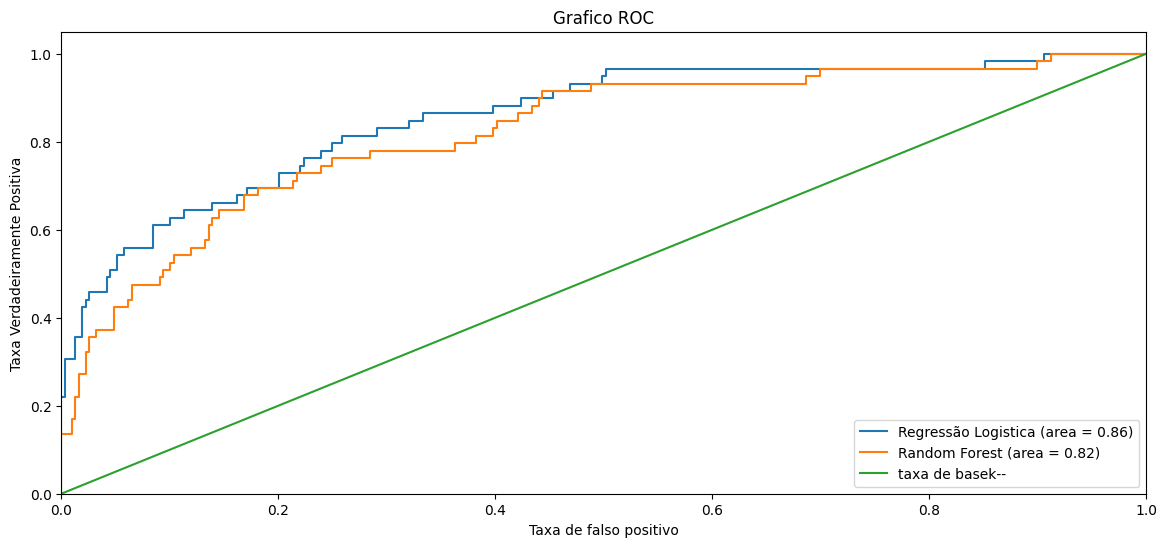

In [105]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

plt.plot(fpr, tpr, label='Regressão Logistica (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)
plt.plot([0,1], [0,1],label='taxa de base' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa Verdadeiramente Positiva')
plt.title('Grafico ROC')
plt.legend(loc="lower right")
plt.show()

Como mostrado acima, o modelo de Regressão Logística ajustado apresentou uma pontuação AUC maior em comparação com o Classificador Random Forest.

# Conclusões

## Categoria de Risco

À medida que a empresa gera mais dados sobre seus funcionários (sobre Novos Funcionários e Evasores Recentes), o algoritmo pode ser re-treinado usando os dados adicionais e teoricamente gerar previsões mais precisas para identificar funcionários de alto risco de evasão com base no rótulo probabilístico atribuído a cada variável de característica (ou seja, funcionário) pelo algoritmo.

Os funcionários podem ser atribuídos a uma "Categoria de Risco" com base no rótulo previsto, da seguinte forma:

 * Baixo risco para funcionários com rótulo < 0.6
 * Médio risco para funcionários com rótulo entre 0.6 e 0.8
 * Alto risco para funcionários com rótulo > 0.8


## Plano Estratégico de Retenção

Os indicadores mais fortes de saída de funcionários incluem:

 * **Renda Mensal**: Pessoas com salários mais altos são menos propensas a deixar a empresa. Portanto, esforços devem ser feitos para coletar informações sobre os benchmarks do setor no mercado local atual para determinar se a empresa está oferecendo salários competitivos.

 * **Horas Extras**: Pessoas que trabalham horas extras são mais propensas a deixar a empresa. Portanto, esforços devem ser feitos para definir adequadamente o escopo dos projetos com suporte e mão-de-obra adequados para reduzir o uso de horas extras.

 * **Anos com o Atual Gerente**: Um grande número de funcionários sai seis meses após seus gerentes atuais. Usando os detalhes dos gerentes diretos para cada funcionário, é possível determinar quais gerentes tiveram o maior número de funcionários se demitindo no último ano. Várias métricas podem ser usadas aqui para determinar se ações devem ser tomadas com um gerente direto:

 * **Número de funcionários sob gerentes com altas taxas de rotatividade**: isso indicaria que a estrutura da organização pode precisar ser revisitada para melhorar a eficiência.
 * Número de anos que o gerente direto está em uma determinada posição: isso pode indicar que os funcionários podem precisar de treinamento em gestão ou serem designados a um mentor (de preferência um executivo) na organização.
 * **Padrões nos funcionários que se demitiram**: isso pode indicar padrões recorrentes de funcionários saindo, caso em que ações podem ser tomadas de acordo.
 * **Idade**: Funcionários na faixa etária relativamente jovem de 25-35 anos são mais propensos a sair. Portanto, esforços devem ser feitos para articular claramente a visão de longo prazo da empresa e como os jovens funcionários se encaixam nessa visão, bem como fornecer incentivos na forma de caminhos claros para promoções, por exemplo.

 * **Distância de Casa**: Funcionários que moram mais longe de casa são mais propensos a deixar a empresa. Portanto, esforços devem ser feitos para fornecer suporte na forma de transporte da empresa para grupos de funcionários que moram na mesma área ou na forma de subsídio de transporte. A triagem inicial de funcionários com base na localização de sua residência provavelmente não é recomendada, pois seria considerada uma forma de discriminação, desde que os funcionários cheguem ao trabalho no horário todos os dias.

 * **Total de Anos de Trabalho**: Funcionários mais experientes são menos propensos a sair. Funcionários com entre 5-8 anos de experiência devem ser identificados como potencialmente tendo um risco maior de sair.

 * **Anos na Empresa**: Funcionários leais são menos propensos a sair. Funcionários que completam seu segundo aniversário na empresa devem ser identificados como potencialmente tendo um risco maior de sair.

Um "Plano de Retenção" estratégico deve ser elaborado para cada grupo de Categoria de Risco. Além das etapas sugeridas para cada característica listada acima, reuniões presenciais entre um representante de RH e os funcionários podem ser iniciadas para funcionários de risco médio e alto para discutir as condições de trabalho. Além disso, uma reunião com o gerente direto desses funcionários permitiria discutir o ambiente de trabalho dentro da equipe e se ações podem ser tomadas para melhorá-lo.